In [1]:
import sys

sys.path.append('../gtm/')
sys.path.append('../simulation/')

In [2]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import pickle
import numpy as np
from random import random
import torch
import pandas as pd
from tqdm import tqdm
from corpus import GTMCorpus
from patsy import dmatrix
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA


from gtm import GTM
from sim_gtm import generate_docs_by_gtm, estimate_dist_by_gtm
from sim_lda import generate_docs_by_lda, estimate_dist_by_lda

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import importlib
import gtm
importlib.reload(gtm)
from gtm import GTM

### logi_norm * mlp (update=false)

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:48<00:00, 92.15it/s]



Epoch   1	Mean Training Loss:2.5713489

Topic_0: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']
Topic_1: ['word_411', 'word_966', 'word_932', 'word_398', 'word_762']
Topic_2: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']



Epoch   2	Mean Training Loss:1.3882302

Topic_0: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']
Topic_1: ['word_966', 'word_411', 'word_932', 'word_398', 'word_520']
Topic_2: ['word_966', 'word_411', 'word_762', 'word_400', 'word_398']



Epoch   3	Mean Training Loss:1.2151522

Topic_0: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']
Topic_1: ['word_966', 'word_411', 'word_932', 'word_398', 'word_762']
Topic_2: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']



Epoch   4	Mean Training Loss:1.2052003

Topic_0: ['word_966', 'word_411', 'word_762', 'word_398', 'word_400']
Topic_1: ['word_966', 'word_411', 'word_932', 'word_398', 'word_762']
Topic_2: ['word_966', 'word_411', 'word_762', 'word_398', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.28it/s]



Epoch   1	Mean Training Loss:2.7081202

Topic_0: ['word_917', 'word_362', 'word_481', 'word_286', 'word_150']
Topic_1: ['word_471', 'word_170', 'word_917', 'word_362', 'word_760']
Topic_2: ['word_917', 'word_362', 'word_696', 'word_170', 'word_471']
Topic_3: ['word_471', 'word_481', 'word_917', 'word_362', 'word_696']



Epoch   2	Mean Training Loss:1.9929379

Topic_0: ['word_917', 'word_471', 'word_481', 'word_286', 'word_224']
Topic_1: ['word_471', 'word_917', 'word_481', 'word_8', 'word_957']
Topic_2: ['word_917', 'word_362', 'word_224', 'word_471', 'word_696']
Topic_3: ['word_471', 'word_917', 'word_224', 'word_362', 'word_481']



Epoch   3	Mean Training Loss:1.7637003

Topic_0: ['word_917', 'word_471', 'word_481', 'word_286', 'word_170']
Topic_1: ['word_471', 'word_481', 'word_917', 'word_495', 'word_957']
Topic_2: ['word_917', 'word_362', 'word_224', 'word_471', 'word_696']
Topic_3: ['word_471', 'word_917', 'word_224', 'word_362', 'word_481']



Epoch   4	Mean Training Loss:1.7

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.57it/s]



Epoch   1	Mean Training Loss:2.8004826

Topic_0: ['word_795', 'word_898', 'word_664', 'word_422', 'word_237']
Topic_1: ['word_268', 'word_795', 'word_237', 'word_422', 'word_670']
Topic_2: ['word_237', 'word_795', 'word_664', 'word_268', 'word_422']
Topic_3: ['word_237', 'word_664', 'word_795', 'word_898', 'word_422']
Topic_4: ['word_664', 'word_422', 'word_670', 'word_312', 'word_795']



Epoch   2	Mean Training Loss:1.5236906

Topic_0: ['word_664', 'word_795', 'word_237', 'word_312', 'word_422']
Topic_1: ['word_664', 'word_795', 'word_237', 'word_670', 'word_422']
Topic_2: ['word_664', 'word_795', 'word_237', 'word_422', 'word_312']
Topic_3: ['word_664', 'word_795', 'word_237', 'word_312', 'word_670']
Topic_4: ['word_664', 'word_795', 'word_237', 'word_312', 'word_422']



Epoch   3	Mean Training Loss:1.4112047

Topic_0: ['word_664', 'word_795', 'word_312', 'word_237', 'word_422']
Topic_1: ['word_664', 'word_795', 'word_237', 'word_670', 'word_422']
Topic_2: ['word_664', 'word_795',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.24it/s]



Epoch   1	Mean Training Loss:3.0952722

Topic_0: ['word_251', 'word_166', 'word_310', 'word_193', 'word_250']
Topic_1: ['word_166', 'word_222', 'word_16', 'word_351', 'word_39']
Topic_2: ['word_222', 'word_351', 'word_166', 'word_348', 'word_745']
Topic_3: ['word_16', 'word_351', 'word_372', 'word_453', 'word_166']
Topic_4: ['word_166', 'word_193', 'word_372', 'word_251', 'word_222']
Topic_5: ['word_166', 'word_351', 'word_16', 'word_451', 'word_250']



Epoch   2	Mean Training Loss:2.2692280

Topic_0: ['word_166', 'word_745', 'word_251', 'word_250', 'word_351']
Topic_1: ['word_166', 'word_39', 'word_745', 'word_351', 'word_251']
Topic_2: ['word_166', 'word_745', 'word_351', 'word_250', 'word_222']
Topic_3: ['word_166', 'word_351', 'word_745', 'word_187', 'word_251']
Topic_4: ['word_166', 'word_745', 'word_251', 'word_222', 'word_250']
Topic_5: ['word_166', 'word_745', 'word_351', 'word_250', 'word_77']



Epoch   3	Mean Training Loss:1.7066939

Topic_0: ['word_166', 'word_745', 'word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.36it/s]



Epoch   1	Mean Training Loss:3.0360807

Topic_0: ['word_139', 'word_303', 'word_324', 'word_76', 'word_669']
Topic_1: ['word_405', 'word_262', 'word_118', 'word_76', 'word_303']
Topic_2: ['word_118', 'word_333', 'word_139', 'word_303', 'word_908']
Topic_3: ['word_303', 'word_405', 'word_118', 'word_324', 'word_908']
Topic_4: ['word_118', 'word_405', 'word_324', 'word_303', 'word_262']
Topic_5: ['word_139', 'word_769', 'word_324', 'word_405', 'word_303']
Topic_6: ['word_324', 'word_303', 'word_405', 'word_118', 'word_215']



Epoch   2	Mean Training Loss:1.8471471

Topic_0: ['word_324', 'word_303', 'word_118', 'word_405', 'word_139']
Topic_1: ['word_324', 'word_303', 'word_118', 'word_405', 'word_333']
Topic_2: ['word_303', 'word_324', 'word_118', 'word_405', 'word_333']
Topic_3: ['word_303', 'word_324', 'word_118', 'word_405', 'word_139']
Topic_4: ['word_324', 'word_303', 'word_118', 'word_405', 'word_333']
Topic_5: ['word_324', 'word_303', 'word_118', 'word_405', 'word_333']
Topic_6:

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.17it/s]



Epoch   1	Mean Training Loss:2.9526132

Topic_0: ['word_211', 'word_151', 'word_88', 'word_273', 'word_152']
Topic_1: ['word_974', 'word_152', 'word_151', 'word_618', 'word_767']
Topic_2: ['word_151', 'word_88', 'word_152', 'word_974', 'word_290']
Topic_3: ['word_974', 'word_618', 'word_88', 'word_249', 'word_146']
Topic_4: ['word_152', 'word_974', 'word_151', 'word_273', 'word_249']
Topic_5: ['word_88', 'word_123', 'word_974', 'word_25', 'word_151']
Topic_6: ['word_974', 'word_123', 'word_618', 'word_88', 'word_175']
Topic_7: ['word_748', 'word_151', 'word_88', 'word_152', 'word_959']



Epoch   2	Mean Training Loss:1.7203143

Topic_0: ['word_88', 'word_974', 'word_211', 'word_354', 'word_152']
Topic_1: ['word_974', 'word_88', 'word_354', 'word_211', 'word_959']
Topic_2: ['word_88', 'word_974', 'word_354', 'word_211', 'word_959']
Topic_3: ['word_974', 'word_88', 'word_354', 'word_211', 'word_748']
Topic_4: ['word_974', 'word_88', 'word_354', 'word_211', 'word_748']
Topic_5: ['word_88

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 92.98it/s]



Epoch   1	Mean Training Loss:3.1414518

Topic_0: ['word_699', 'word_39', 'word_569', 'word_115', 'word_925']
Topic_1: ['word_699', 'word_203', 'word_102', 'word_840', 'word_115']
Topic_2: ['word_910', 'word_74', 'word_317', 'word_569', 'word_115']
Topic_3: ['word_569', 'word_74', 'word_203', 'word_699', 'word_597']
Topic_4: ['word_317', 'word_162', 'word_115', 'word_710', 'word_103']
Topic_5: ['word_74', 'word_910', 'word_710', 'word_102', 'word_203']
Topic_6: ['word_97', 'word_74', 'word_224', 'word_18', 'word_710']
Topic_7: ['word_910', 'word_74', 'word_305', 'word_97', 'word_203']
Topic_8: ['word_74', 'word_569', 'word_344', 'word_103', 'word_203']



Epoch   2	Mean Training Loss:2.1947996

Topic_0: ['word_39', 'word_103', 'word_305', 'word_97', 'word_18']
Topic_1: ['word_39', 'word_103', 'word_97', 'word_305', 'word_18']
Topic_2: ['word_39', 'word_103', 'word_305', 'word_97', 'word_18']
Topic_3: ['word_39', 'word_103', 'word_97', 'word_305', 'word_18']
Topic_4: ['word_39', 'word_1

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.11it/s]



Epoch   1	Mean Training Loss:3.3171543

Topic_0: ['word_654', 'word_619', 'word_64', 'word_659', 'word_784']
Topic_1: ['word_654', 'word_619', 'word_415', 'word_617', 'word_64']
Topic_2: ['word_619', 'word_758', 'word_654', 'word_164', 'word_305']
Topic_3: ['word_619', 'word_784', 'word_398', 'word_736', 'word_244']
Topic_4: ['word_654', 'word_619', 'word_784', 'word_758', 'word_64']
Topic_5: ['word_619', 'word_19', 'word_183', 'word_659', 'word_784']
Topic_6: ['word_173', 'word_127', 'word_398', 'word_619', 'word_736']
Topic_7: ['word_64', 'word_619', 'word_654', 'word_183', 'word_244']
Topic_8: ['word_654', 'word_619', 'word_784', 'word_415', 'word_860']
Topic_9: ['word_619', 'word_654', 'word_112', 'word_64', 'word_860']



Epoch   2	Mean Training Loss:2.5486684

Topic_0: ['word_619', 'word_415', 'word_112', 'word_64', 'word_784']
Topic_1: ['word_619', 'word_415', 'word_112', 'word_64', 'word_784']
Topic_2: ['word_619', 'word_415', 'word_112', 'word_939', 'word_64']
Topic_3: ['word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.50it/s]



Epoch   1	Mean Training Loss:3.2812242

Topic_0: ['word_937', 'word_4', 'word_811', 'word_15', 'word_610']
Topic_1: ['word_811', 'word_124', 'word_937', 'word_15', 'word_947']
Topic_2: ['word_134', 'word_536', 'word_124', 'word_366', 'word_884']
Topic_3: ['word_570', 'word_884', 'word_156', 'word_735', 'word_413']
Topic_4: ['word_2', 'word_947', 'word_366', 'word_884', 'word_124']
Topic_5: ['word_536', 'word_2', 'word_15', 'word_947', 'word_104']
Topic_6: ['word_947', 'word_884', 'word_15', 'word_2', 'word_735']
Topic_7: ['word_884', 'word_2', 'word_134', 'word_947', 'word_124']
Topic_8: ['word_536', 'word_15', 'word_884', 'word_937', 'word_735']
Topic_9: ['word_811', 'word_134', 'word_366', 'word_825', 'word_890']
Topic_10: ['word_2', 'word_134', 'word_610', 'word_811', 'word_735']



Epoch   2	Mean Training Loss:2.0070600

Topic_0: ['word_811', 'word_570', 'word_890', 'word_15', 'word_124']
Topic_1: ['word_811', 'word_570', 'word_890', 'word_124', 'word_15']
Topic_2: ['word_570', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.44it/s]



Epoch   1	Mean Training Loss:3.4459540

Topic_0: ['word_75', 'word_341', 'word_54', 'word_626', 'word_316']
Topic_1: ['word_75', 'word_51', 'word_54', 'word_840', 'word_887']
Topic_2: ['word_75', 'word_763', 'word_659', 'word_84', 'word_887']
Topic_3: ['word_840', 'word_887', 'word_84', 'word_375', 'word_763']
Topic_4: ['word_659', 'word_75', 'word_375', 'word_316', 'word_763']
Topic_5: ['word_84', 'word_156', 'word_659', 'word_341', 'word_316']
Topic_6: ['word_75', 'word_13', 'word_375', 'word_54', 'word_51']
Topic_7: ['word_75', 'word_887', 'word_626', 'word_420', 'word_97']
Topic_8: ['word_84', 'word_75', 'word_840', 'word_375', 'word_420']
Topic_9: ['word_972', 'word_54', 'word_75', 'word_840', 'word_13']
Topic_10: ['word_972', 'word_75', 'word_763', 'word_156', 'word_375']
Topic_11: ['word_75', 'word_13', 'word_761', 'word_54', 'word_887']



Epoch   2	Mean Training Loss:2.3812446

Topic_0: ['word_75', 'word_156', 'word_972', 'word_54', 'word_887']
Topic_1: ['word_75', 'word_972'

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.71it/s]



Epoch   1	Mean Training Loss:3.3032409

Topic_0: ['word_694', 'word_250', 'word_267', 'word_706', 'word_501']
Topic_1: ['word_25', 'word_267', 'word_273', 'word_398', 'word_927']
Topic_2: ['word_25', 'word_267', 'word_694', 'word_706', 'word_532']
Topic_3: ['word_267', 'word_273', 'word_501', 'word_398', 'word_791']
Topic_4: ['word_267', 'word_398', 'word_712', 'word_25', 'word_501']
Topic_5: ['word_398', 'word_273', 'word_532', 'word_25', 'word_267']
Topic_6: ['word_267', 'word_398', 'word_273', 'word_706', 'word_25']
Topic_7: ['word_777', 'word_694', 'word_267', 'word_501', 'word_599']
Topic_8: ['word_273', 'word_267', 'word_331', 'word_791', 'word_250']
Topic_9: ['word_267', 'word_599', 'word_706', 'word_25', 'word_712']
Topic_10: ['word_267', 'word_273', 'word_25', 'word_398', 'word_599']
Topic_11: ['word_532', 'word_250', 'word_501', 'word_267', 'word_706']
Topic_12: ['word_25', 'word_267', 'word_777', 'word_16', 'word_398']



Epoch   2	Mean Training Loss:2.0360320

Topic_0: ['w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.54it/s]



Epoch   1	Mean Training Loss:3.3909823

Topic_0: ['word_561', 'word_630', 'word_452', 'word_422', 'word_58']
Topic_1: ['word_630', 'word_952', 'word_743', 'word_452', 'word_678']
Topic_2: ['word_665', 'word_452', 'word_422', 'word_789', 'word_630']
Topic_3: ['word_452', 'word_665', 'word_463', 'word_223', 'word_952']
Topic_4: ['word_218', 'word_789', 'word_665', 'word_826', 'word_422']
Topic_5: ['word_952', 'word_678', 'word_452', 'word_223', 'word_665']
Topic_6: ['word_665', 'word_452', 'word_952', 'word_789', 'word_984']
Topic_7: ['word_630', 'word_452', 'word_665', 'word_789', 'word_678']
Topic_8: ['word_665', 'word_452', 'word_97', 'word_561', 'word_811']
Topic_9: ['word_422', 'word_223', 'word_665', 'word_452', 'word_789']
Topic_10: ['word_452', 'word_665', 'word_630', 'word_952', 'word_422']
Topic_11: ['word_452', 'word_97', 'word_422', 'word_630', 'word_223']
Topic_12: ['word_665', 'word_952', 'word_422', 'word_452', 'word_218']
Topic_13: ['word_665', 'word_452', 'word_630', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.42it/s]



Epoch   1	Mean Training Loss:3.4581115

Topic_0: ['word_772', 'word_612', 'word_673', 'word_16', 'word_881']
Topic_1: ['word_306', 'word_168', 'word_999', 'word_299', 'word_612']
Topic_2: ['word_299', 'word_168', 'word_999', 'word_479', 'word_950']
Topic_3: ['word_299', 'word_738', 'word_877', 'word_16', 'word_999']
Topic_4: ['word_614', 'word_401', 'word_299', 'word_738', 'word_673']
Topic_5: ['word_738', 'word_614', 'word_772', 'word_999', 'word_168']
Topic_6: ['word_934', 'word_612', 'word_614', 'word_488', 'word_673']
Topic_7: ['word_168', 'word_612', 'word_692', 'word_614', 'word_827']
Topic_8: ['word_881', 'word_612', 'word_401', 'word_798', 'word_488']
Topic_9: ['word_299', 'word_881', 'word_168', 'word_999', 'word_202']
Topic_10: ['word_5', 'word_614', 'word_401', 'word_168', 'word_997']
Topic_11: ['word_673', 'word_168', 'word_692', 'word_738', 'word_306']
Topic_12: ['word_299', 'word_772', 'word_673', 'word_168', 'word_306']
Topic_13: ['word_627', 'word_299', 'word_997', 'wo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.63it/s]



Epoch   1	Mean Training Loss:3.4010914

Topic_0: ['word_250', 'word_629', 'word_779', 'word_488', 'word_102']
Topic_1: ['word_125', 'word_779', 'word_488', 'word_323', 'word_643']
Topic_2: ['word_321', 'word_440', 'word_323', 'word_488', 'word_629']
Topic_3: ['word_250', 'word_125', 'word_779', 'word_321', 'word_488']
Topic_4: ['word_643', 'word_323', 'word_440', 'word_125', 'word_629']
Topic_5: ['word_488', 'word_363', 'word_440', 'word_643', 'word_809']
Topic_6: ['word_779', 'word_250', 'word_323', 'word_564', 'word_125']
Topic_7: ['word_125', 'word_779', 'word_954', 'word_629', 'word_488']
Topic_8: ['word_629', 'word_125', 'word_564', 'word_102', 'word_488']
Topic_9: ['word_488', 'word_323', 'word_440', 'word_125', 'word_946']
Topic_10: ['word_643', 'word_440', 'word_488', 'word_250', 'word_954']
Topic_11: ['word_323', 'word_643', 'word_567', 'word_250', 'word_605']
Topic_12: ['word_730', 'word_488', 'word_954', 'word_643', 'word_250']
Topic_13: ['word_119', 'word_440', 'word_948',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.71it/s]



Epoch   1	Mean Training Loss:3.4681984

Topic_0: ['word_956', 'word_574', 'word_904', 'word_200', 'word_272']
Topic_1: ['word_904', 'word_285', 'word_699', 'word_778', 'word_200']
Topic_2: ['word_69', 'word_778', 'word_904', 'word_728', 'word_426']
Topic_3: ['word_904', 'word_699', 'word_103', 'word_515', 'word_728']
Topic_4: ['word_904', 'word_200', 'word_515', 'word_778', 'word_69']
Topic_5: ['word_904', 'word_496', 'word_69', 'word_898', 'word_103']
Topic_6: ['word_513', 'word_496', 'word_334', 'word_69', 'word_285']
Topic_7: ['word_103', 'word_285', 'word_904', 'word_956', 'word_83']
Topic_8: ['word_904', 'word_778', 'word_334', 'word_793', 'word_782']
Topic_9: ['word_69', 'word_285', 'word_904', 'word_574', 'word_313']
Topic_10: ['word_496', 'word_904', 'word_69', 'word_782', 'word_515']
Topic_11: ['word_285', 'word_69', 'word_904', 'word_103', 'word_515']
Topic_12: ['word_898', 'word_285', 'word_782', 'word_574', 'word_835']
Topic_13: ['word_904', 'word_69', 'word_513', 'word_10

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.64it/s]



Epoch   1	Mean Training Loss:4.0209157

Topic_0: ['word_223', 'word_258', 'word_388', 'word_19', 'word_543']
Topic_1: ['word_223', 'word_388', 'word_976', 'word_543', 'word_590']
Topic_2: ['word_223', 'word_464', 'word_221', 'word_675', 'word_263']
Topic_3: ['word_223', 'word_388', 'word_464', 'word_600', 'word_100']
Topic_4: ['word_223', 'word_543', 'word_709', 'word_942', 'word_388']
Topic_5: ['word_223', 'word_600', 'word_258', 'word_543', 'word_976']
Topic_6: ['word_223', 'word_464', 'word_388', 'word_942', 'word_258']
Topic_7: ['word_223', 'word_19', 'word_543', 'word_464', 'word_340']
Topic_8: ['word_223', 'word_464', 'word_19', 'word_590', 'word_543']
Topic_9: ['word_223', 'word_464', 'word_543', 'word_600', 'word_100']
Topic_10: ['word_223', 'word_709', 'word_543', 'word_19', 'word_464']
Topic_11: ['word_223', 'word_709', 'word_388', 'word_19', 'word_464']
Topic_12: ['word_223', 'word_709', 'word_543', 'word_340', 'word_221']
Topic_13: ['word_223', 'word_464', 'word_388', 'wor

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.88it/s]



Epoch   1	Mean Training Loss:3.4938156

Topic_0: ['word_213', 'word_173', 'word_493', 'word_414', 'word_769']
Topic_1: ['word_173', 'word_550', 'word_769', 'word_934', 'word_493']
Topic_2: ['word_173', 'word_540', 'word_756', 'word_950', 'word_493']
Topic_3: ['word_550', 'word_414', 'word_806', 'word_493', 'word_950']
Topic_4: ['word_493', 'word_540', 'word_487', 'word_290', 'word_550']
Topic_5: ['word_950', 'word_769', 'word_173', 'word_540', 'word_493']
Topic_6: ['word_487', 'word_173', 'word_550', 'word_414', 'word_540']
Topic_7: ['word_173', 'word_540', 'word_414', 'word_493', 'word_769']
Topic_8: ['word_290', 'word_769', 'word_540', 'word_213', 'word_659']
Topic_9: ['word_414', 'word_312', 'word_950', 'word_540', 'word_493']
Topic_10: ['word_540', 'word_414', 'word_173', 'word_550', 'word_547']
Topic_11: ['word_659', 'word_493', 'word_213', 'word_950', 'word_173']
Topic_12: ['word_173', 'word_493', 'word_769', 'word_16', 'word_540']
Topic_13: ['word_540', 'word_493', 'word_173', 

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.65it/s]



Epoch   1	Mean Training Loss:3.5038953

Topic_0: ['word_426', 'word_576', 'word_916', 'word_902', 'word_808']
Topic_1: ['word_52', 'word_433', 'word_974', 'word_360', 'word_426']
Topic_2: ['word_902', 'word_543', 'word_985', 'word_426', 'word_808']
Topic_3: ['word_360', 'word_920', 'word_808', 'word_992', 'word_407']
Topic_4: ['word_543', 'word_426', 'word_920', 'word_902', 'word_808']
Topic_5: ['word_433', 'word_360', 'word_380', 'word_426', 'word_155']
Topic_6: ['word_992', 'word_748', 'word_426', 'word_902', 'word_576']
Topic_7: ['word_495', 'word_543', 'word_990', 'word_902', 'word_433']
Topic_8: ['word_902', 'word_445', 'word_808', 'word_973', 'word_52']
Topic_9: ['word_52', 'word_360', 'word_543', 'word_380', 'word_808']
Topic_10: ['word_407', 'word_756', 'word_576', 'word_748', 'word_902']
Topic_11: ['word_576', 'word_916', 'word_902', 'word_407', 'word_433']
Topic_12: ['word_360', 'word_974', 'word_186', 'word_748', 'word_491']
Topic_13: ['word_543', 'word_985', 'word_407', 'w

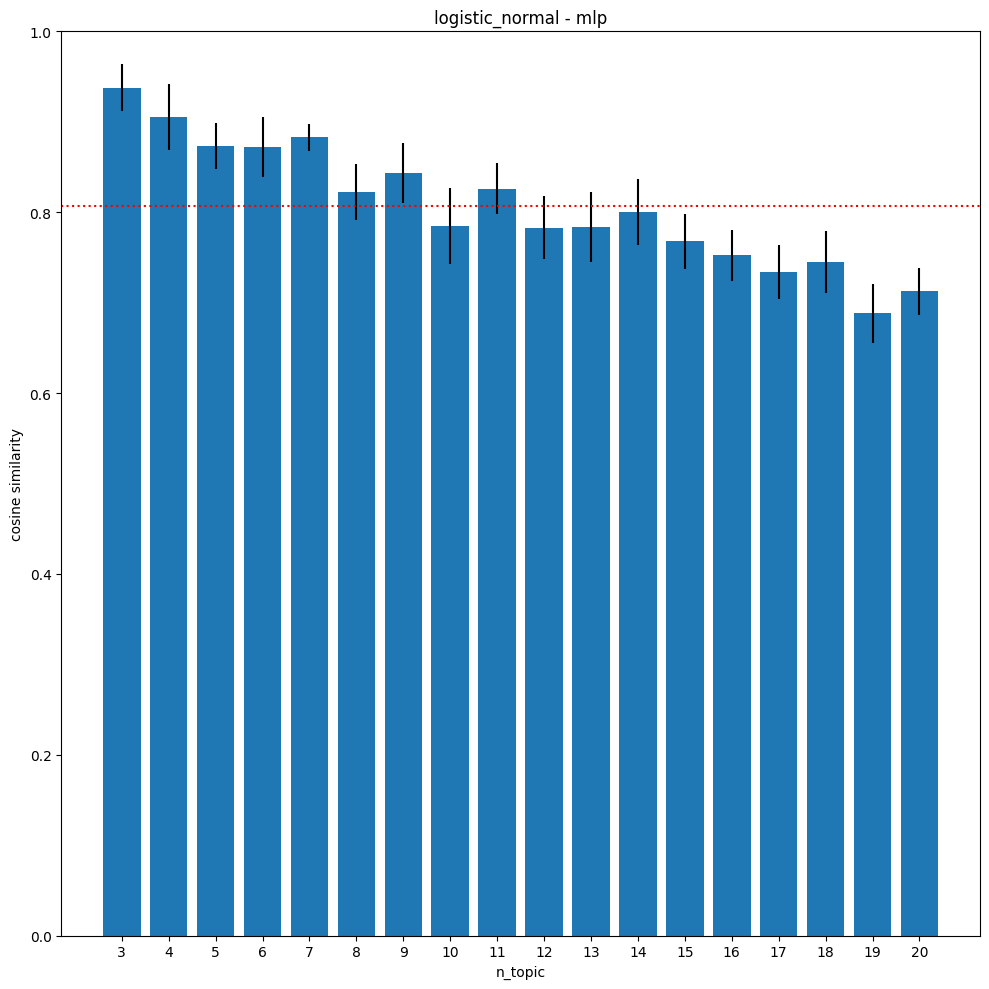

In [4]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": False,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (without covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### logi_norm * mlp (update=True)

100%|██████████| 10000/10000 [01:46<00:00, 94.01it/s]



Epoch   1	Mean Training Loss:4.6260829

Topic_0: ['word_240', 'word_161', 'word_488', 'word_155', 'word_378']
Topic_1: ['word_240', 'word_488', 'word_933', 'word_378', 'word_155']
Topic_2: ['word_240', 'word_973', 'word_933', 'word_544', 'word_367']
Intercept: ['word_240', 'word_488', 'word_378', 'word_155', 'word_933']
content: ['word_240', 'word_933', 'word_510', 'word_367', 'word_973']



Epoch   2	Mean Training Loss:0.5896941

Topic_0: ['word_240', 'word_161', 'word_378', 'word_488', 'word_151']
Topic_1: ['word_240', 'word_488', 'word_155', 'word_378', 'word_367']
Topic_2: ['word_240', 'word_488', 'word_131', 'word_973', 'word_933']
Intercept: ['word_240', 'word_488', 'word_378', 'word_155', 'word_466']
content: ['word_510', 'word_933', 'word_367', 'word_51', 'word_365']



Epoch   3	Mean Training Loss:0.5498398

Topic_0: ['word_240', 'word_161', 'word_378', 'word_151', 'word_303']
Topic_1: ['word_240', 'word_488', 'word_155', 'word_378', 'word_466']
Topic_2: ['word_240', 'word_48

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:48<00:00, 92.52it/s]



Epoch   1	Mean Training Loss:1.7094533

Topic_0: ['word_284', 'word_253', 'word_680', 'word_2', 'word_438']
Topic_1: ['word_680', 'word_253', 'word_284', 'word_438', 'word_105']
Topic_2: ['word_253', 'word_284', 'word_2', 'word_680', 'word_105']
Topic_3: ['word_680', 'word_253', 'word_284', 'word_438', 'word_945']
Intercept: ['word_284', 'word_253', 'word_680', 'word_2', 'word_811']
content: ['word_680', 'word_945', 'word_438', 'word_253', 'word_284']



Epoch   2	Mean Training Loss:0.5973805

Topic_0: ['word_284', 'word_253', 'word_232', 'word_438', 'word_680']
Topic_1: ['word_680', 'word_253', 'word_105', 'word_284', 'word_438']
Topic_2: ['word_253', 'word_284', 'word_2', 'word_105', 'word_438']
Topic_3: ['word_680', 'word_945', 'word_284', 'word_438', 'word_253']
Intercept: ['word_284', 'word_253', 'word_680', 'word_2', 'word_811']
content: ['word_680', 'word_945', 'word_438', 'word_108', 'word_376']



Epoch   3	Mean Training Loss:0.5779319

Topic_0: ['word_284', 'word_253', 'word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 92.62it/s]



Epoch   1	Mean Training Loss:2.7865936

Topic_0: ['word_56', 'word_183', 'word_239', 'word_255', 'word_268']
Topic_1: ['word_56', 'word_183', 'word_239', 'word_268', 'word_94']
Topic_2: ['word_56', 'word_239', 'word_183', 'word_482', 'word_279']
Topic_3: ['word_56', 'word_239', 'word_183', 'word_268', 'word_470']
Topic_4: ['word_56', 'word_239', 'word_183', 'word_769', 'word_774']
Intercept: ['word_56', 'word_183', 'word_239', 'word_268', 'word_470']
content: ['word_56', 'word_774', 'word_327', 'word_368', 'word_769']



Epoch   2	Mean Training Loss:0.6786716

Topic_0: ['word_56', 'word_183', 'word_239', 'word_268', 'word_255']
Topic_1: ['word_56', 'word_183', 'word_239', 'word_268', 'word_94']
Topic_2: ['word_56', 'word_239', 'word_183', 'word_482', 'word_279']
Topic_3: ['word_56', 'word_239', 'word_183', 'word_268', 'word_470']
Topic_4: ['word_56', 'word_183', 'word_239', 'word_774', 'word_769']
Intercept: ['word_56', 'word_183', 'word_239', 'word_268', 'word_470']
content: ['word_7

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:49<00:00, 91.59it/s]



Epoch   1	Mean Training Loss:1.8806513

Topic_0: ['word_420', 'word_339', 'word_229', 'word_318', 'word_133']
Topic_1: ['word_133', 'word_420', 'word_339', 'word_229', 'word_91']
Topic_2: ['word_133', 'word_420', 'word_339', 'word_229', 'word_639']
Topic_3: ['word_229', 'word_133', 'word_420', 'word_339', 'word_318']
Topic_4: ['word_420', 'word_339', 'word_133', 'word_580', 'word_577']
Topic_5: ['word_229', 'word_339', 'word_420', 'word_133', 'word_318']
Intercept: ['word_339', 'word_420', 'word_133', 'word_229', 'word_318']
content: ['word_229', 'word_339', 'word_35', 'word_6', 'word_420']



Epoch   2	Mean Training Loss:0.6981682

Topic_0: ['word_339', 'word_420', 'word_229', 'word_318', 'word_6']
Topic_1: ['word_133', 'word_420', 'word_339', 'word_91', 'word_639']
Topic_2: ['word_133', 'word_420', 'word_339', 'word_639', 'word_229']
Topic_3: ['word_229', 'word_133', 'word_318', 'word_420', 'word_339']
Topic_4: ['word_420', 'word_339', 'word_580', 'word_577', 'word_133']
Topic_5: ['

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.88it/s]



Epoch   1	Mean Training Loss:2.0799067

Topic_0: ['word_736', 'word_536', 'word_181', 'word_128', 'word_43']
Topic_1: ['word_736', 'word_181', 'word_229', 'word_128', 'word_300']
Topic_2: ['word_736', 'word_300', 'word_229', 'word_181', 'word_128']
Topic_3: ['word_736', 'word_181', 'word_128', 'word_229', 'word_43']
Topic_4: ['word_536', 'word_128', 'word_43', 'word_776', 'word_372']
Topic_5: ['word_128', 'word_736', 'word_43', 'word_181', 'word_536']
Topic_6: ['word_736', 'word_43', 'word_128', 'word_181', 'word_300']
Intercept: ['word_736', 'word_181', 'word_128', 'word_536', 'word_43']
content: ['word_536', 'word_128', 'word_43', 'word_776', 'word_170']



Epoch   2	Mean Training Loss:0.7784358

Topic_0: ['word_536', 'word_736', 'word_776', 'word_181', 'word_43']
Topic_1: ['word_736', 'word_181', 'word_229', 'word_300', 'word_128']
Topic_2: ['word_736', 'word_181', 'word_300', 'word_229', 'word_875']
Topic_3: ['word_736', 'word_181', 'word_300', 'word_229', 'word_43']
Topic_4: ['wo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:45<00:00, 94.44it/s]



Epoch   1	Mean Training Loss:4.1176218

Topic_0: ['word_685', 'word_850', 'word_249', 'word_481', 'word_33']
Topic_1: ['word_685', 'word_249', 'word_850', 'word_33', 'word_178']
Topic_2: ['word_685', 'word_850', 'word_249', 'word_33', 'word_178']
Topic_3: ['word_685', 'word_850', 'word_249', 'word_178', 'word_481']
Topic_4: ['word_685', 'word_249', 'word_850', 'word_178', 'word_33']
Topic_5: ['word_685', 'word_850', 'word_249', 'word_178', 'word_240']
Topic_6: ['word_685', 'word_850', 'word_249', 'word_178', 'word_481']
Topic_7: ['word_685', 'word_850', 'word_249', 'word_178', 'word_481']
Intercept: ['word_685', 'word_850', 'word_249', 'word_178', 'word_481']
content: ['word_685', 'word_165', 'word_55', 'word_446', 'word_144']



Epoch   2	Mean Training Loss:0.5431233

Topic_0: ['word_685', 'word_850', 'word_249', 'word_33', 'word_481']
Topic_1: ['word_685', 'word_249', 'word_850', 'word_33', 'word_178']
Topic_2: ['word_685', 'word_850', 'word_249', 'word_33', 'word_178']
Topic_3: ['w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.02it/s]



Epoch   1	Mean Training Loss:4.1092412

Topic_0: ['word_81', 'word_666', 'word_6', 'word_891', 'word_213']
Topic_1: ['word_81', 'word_666', 'word_6', 'word_479', 'word_891']
Topic_2: ['word_81', 'word_666', 'word_6', 'word_170', 'word_436']
Topic_3: ['word_81', 'word_666', 'word_6', 'word_676', 'word_436']
Topic_4: ['word_666', 'word_81', 'word_6', 'word_891', 'word_170']
Topic_5: ['word_81', 'word_666', 'word_6', 'word_191', 'word_877']
Topic_6: ['word_81', 'word_666', 'word_6', 'word_891', 'word_167']
Topic_7: ['word_81', 'word_666', 'word_891', 'word_6', 'word_200']
Topic_8: ['word_81', 'word_666', 'word_6', 'word_891', 'word_676']
Intercept: ['word_81', 'word_666', 'word_6', 'word_170', 'word_891']
content: ['word_666', 'word_6', 'word_676', 'word_81', 'word_247']



Epoch   2	Mean Training Loss:0.6300984

Topic_0: ['word_81', 'word_666', 'word_891', 'word_6', 'word_213']
Topic_1: ['word_81', 'word_6', 'word_213', 'word_666', 'word_891']
Topic_2: ['word_81', 'word_666', 'word_170'

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:45<00:00, 94.53it/s]



Epoch   1	Mean Training Loss:2.0011283

Topic_0: ['word_140', 'word_233', 'word_119', 'word_19', 'word_809']
Topic_1: ['word_140', 'word_233', 'word_647', 'word_906', 'word_809']
Topic_2: ['word_140', 'word_119', 'word_233', 'word_887', 'word_19']
Topic_3: ['word_30', 'word_19', 'word_887', 'word_119', 'word_140']
Topic_4: ['word_140', 'word_233', 'word_119', 'word_19', 'word_906']
Topic_5: ['word_140', 'word_887', 'word_19', 'word_30', 'word_841']
Topic_6: ['word_30', 'word_887', 'word_119', 'word_140', 'word_19']
Topic_7: ['word_887', 'word_140', 'word_30', 'word_19', 'word_233']
Topic_8: ['word_887', 'word_119', 'word_30', 'word_19', 'word_140']
Topic_9: ['word_19', 'word_119', 'word_887', 'word_30', 'word_841']
Intercept: ['word_19', 'word_887', 'word_119', 'word_30', 'word_140']
content: ['word_140', 'word_233', 'word_809', 'word_647', 'word_520']



Epoch   2	Mean Training Loss:0.8634137

Topic_0: ['word_140', 'word_233', 'word_647', 'word_809', 'word_520']
Topic_1: ['word_140',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.53it/s]



Epoch   1	Mean Training Loss:2.6702959

Topic_0: ['word_91', 'word_172', 'word_903', 'word_779', 'word_536']
Topic_1: ['word_172', 'word_779', 'word_91', 'word_903', 'word_792']
Topic_2: ['word_91', 'word_172', 'word_779', 'word_903', 'word_792']
Topic_3: ['word_91', 'word_903', 'word_779', 'word_536', 'word_29']
Topic_4: ['word_172', 'word_91', 'word_779', 'word_903', 'word_792']
Topic_5: ['word_91', 'word_903', 'word_779', 'word_536', 'word_172']
Topic_6: ['word_91', 'word_903', 'word_779', 'word_172', 'word_29']
Topic_7: ['word_779', 'word_91', 'word_172', 'word_903', 'word_536']
Topic_8: ['word_91', 'word_779', 'word_536', 'word_172', 'word_903']
Topic_9: ['word_91', 'word_903', 'word_779', 'word_172', 'word_536']
Topic_10: ['word_91', 'word_536', 'word_903', 'word_779', 'word_29']
Intercept: ['word_91', 'word_779', 'word_903', 'word_536', 'word_172']
content: ['word_172', 'word_792', 'word_566', 'word_577', 'word_903']



Epoch   2	Mean Training Loss:0.8227673

Topic_0: ['word_91

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 94.28it/s]



Epoch   1	Mean Training Loss:2.0819042

Topic_0: ['word_123', 'word_21', 'word_891', 'word_626', 'word_939']
Topic_1: ['word_123', 'word_21', 'word_626', 'word_730', 'word_487']
Topic_2: ['word_123', 'word_626', 'word_730', 'word_939', 'word_42']
Topic_3: ['word_123', 'word_626', 'word_939', 'word_21', 'word_730']
Topic_4: ['word_123', 'word_21', 'word_626', 'word_891', 'word_730']
Topic_5: ['word_123', 'word_21', 'word_487', 'word_18', 'word_891']
Topic_6: ['word_123', 'word_21', 'word_626', 'word_891', 'word_939']
Topic_7: ['word_123', 'word_21', 'word_891', 'word_626', 'word_939']
Topic_8: ['word_123', 'word_21', 'word_891', 'word_626', 'word_730']
Topic_9: ['word_21', 'word_123', 'word_891', 'word_626', 'word_939']
Topic_10: ['word_123', 'word_21', 'word_939', 'word_730', 'word_626']
Topic_11: ['word_123', 'word_939', 'word_626', 'word_21', 'word_730']
Intercept: ['word_123', 'word_21', 'word_891', 'word_626', 'word_487']
content: ['word_123', 'word_626', 'word_730', 'word_939', '

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.86it/s]



Epoch   1	Mean Training Loss:7.5435438

Topic_0: ['word_234', 'word_758', 'word_673', 'word_436', 'word_586']
Topic_1: ['word_234', 'word_720', 'word_436', 'word_758', 'word_673']
Topic_2: ['word_234', 'word_673', 'word_758', 'word_365', 'word_739']
Topic_3: ['word_234', 'word_720', 'word_673', 'word_758', 'word_693']
Topic_4: ['word_234', 'word_758', 'word_739', 'word_673', 'word_720']
Topic_5: ['word_234', 'word_673', 'word_758', 'word_693', 'word_746']
Topic_6: ['word_234', 'word_112', 'word_758', 'word_720', 'word_673']
Topic_7: ['word_234', 'word_673', 'word_758', 'word_739', 'word_693']
Topic_8: ['word_234', 'word_758', 'word_720', 'word_673', 'word_693']
Topic_9: ['word_234', 'word_720', 'word_673', 'word_436', 'word_758']
Topic_10: ['word_234', 'word_673', 'word_720', 'word_758', 'word_739']
Topic_11: ['word_234', 'word_673', 'word_758', 'word_365', 'word_739']
Topic_12: ['word_234', 'word_720', 'word_693', 'word_758', 'word_673']
Intercept: ['word_234', 'word_720', 'word_758'

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:45<00:00, 94.35it/s]



Epoch   1	Mean Training Loss:4.5794996

Topic_0: ['word_185', 'word_450', 'word_554', 'word_316', 'word_266']
Topic_1: ['word_185', 'word_450', 'word_316', 'word_554', 'word_671']
Topic_2: ['word_185', 'word_450', 'word_316', 'word_550', 'word_671']
Topic_3: ['word_185', 'word_554', 'word_316', 'word_450', 'word_550']
Topic_4: ['word_185', 'word_450', 'word_550', 'word_316', 'word_671']
Topic_5: ['word_185', 'word_450', 'word_316', 'word_554', 'word_709']
Topic_6: ['word_185', 'word_316', 'word_450', 'word_554', 'word_671']
Topic_7: ['word_185', 'word_450', 'word_316', 'word_554', 'word_550']
Topic_8: ['word_185', 'word_450', 'word_316', 'word_554', 'word_671']
Topic_9: ['word_185', 'word_316', 'word_554', 'word_450', 'word_506']
Topic_10: ['word_185', 'word_450', 'word_316', 'word_506', 'word_168']
Topic_11: ['word_185', 'word_316', 'word_450', 'word_554', 'word_506']
Topic_12: ['word_185', 'word_450', 'word_316', 'word_630', 'word_554']
Topic_13: ['word_185', 'word_450', 'word_316',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.82it/s]



Epoch   1	Mean Training Loss:2.1503574

Topic_0: ['word_971', 'word_705', 'word_581', 'word_579', 'word_379']
Topic_1: ['word_581', 'word_705', 'word_971', 'word_950', 'word_739']
Topic_2: ['word_971', 'word_705', 'word_950', 'word_579', 'word_581']
Topic_3: ['word_971', 'word_705', 'word_579', 'word_581', 'word_739']
Topic_4: ['word_971', 'word_705', 'word_579', 'word_379', 'word_581']
Topic_5: ['word_971', 'word_705', 'word_579', 'word_581', 'word_739']
Topic_6: ['word_950', 'word_351', 'word_581', 'word_971', 'word_338']
Topic_7: ['word_971', 'word_705', 'word_579', 'word_581', 'word_739']
Topic_8: ['word_581', 'word_950', 'word_971', 'word_338', 'word_844']
Topic_9: ['word_581', 'word_950', 'word_351', 'word_739', 'word_705']
Topic_10: ['word_971', 'word_705', 'word_579', 'word_273', 'word_581']
Topic_11: ['word_971', 'word_705', 'word_739', 'word_579', 'word_581']
Topic_12: ['word_581', 'word_338', 'word_950', 'word_351', 'word_971']
Topic_13: ['word_581', 'word_705', 'word_351',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.90it/s]



Epoch   1	Mean Training Loss:2.4272148

Topic_0: ['word_666', 'word_609', 'word_85', 'word_530', 'word_82']
Topic_1: ['word_609', 'word_224', 'word_741', 'word_666', 'word_82']
Topic_2: ['word_609', 'word_224', 'word_289', 'word_903', 'word_530']
Topic_3: ['word_530', 'word_609', 'word_939', 'word_85', 'word_82']
Topic_4: ['word_609', 'word_224', 'word_666', 'word_289', 'word_85']
Topic_5: ['word_609', 'word_530', 'word_666', 'word_85', 'word_82']
Topic_6: ['word_741', 'word_82', 'word_609', 'word_666', 'word_85']
Topic_7: ['word_609', 'word_224', 'word_530', 'word_666', 'word_289']
Topic_8: ['word_530', 'word_666', 'word_85', 'word_82', 'word_609']
Topic_9: ['word_609', 'word_530', 'word_82', 'word_666', 'word_224']
Topic_10: ['word_609', 'word_666', 'word_224', 'word_530', 'word_741']
Topic_11: ['word_609', 'word_224', 'word_530', 'word_666', 'word_741']
Topic_12: ['word_530', 'word_85', 'word_666', 'word_939', 'word_609']
Topic_13: ['word_609', 'word_85', 'word_666', 'word_224', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 94.07it/s]



Epoch   1	Mean Training Loss:2.4574343

Topic_0: ['word_480', 'word_691', 'word_378', 'word_239', 'word_606']
Topic_1: ['word_691', 'word_480', 'word_239', 'word_378', 'word_606']
Topic_2: ['word_480', 'word_691', 'word_239', 'word_378', 'word_606']
Topic_3: ['word_480', 'word_378', 'word_691', 'word_239', 'word_835']
Topic_4: ['word_480', 'word_378', 'word_691', 'word_239', 'word_835']
Topic_5: ['word_480', 'word_239', 'word_378', 'word_691', 'word_606']
Topic_6: ['word_239', 'word_691', 'word_480', 'word_378', 'word_606']
Topic_7: ['word_480', 'word_691', 'word_378', 'word_239', 'word_606']
Topic_8: ['word_480', 'word_239', 'word_691', 'word_378', 'word_606']
Topic_9: ['word_480', 'word_239', 'word_691', 'word_378', 'word_835']
Topic_10: ['word_480', 'word_239', 'word_691', 'word_378', 'word_606']
Topic_11: ['word_480', 'word_239', 'word_691', 'word_378', 'word_835']
Topic_12: ['word_480', 'word_378', 'word_691', 'word_239', 'word_835']
Topic_13: ['word_480', 'word_691', 'word_239',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [02:01<00:00, 82.55it/s]



Epoch   1	Mean Training Loss:2.2119338

Topic_0: ['word_821', 'word_966', 'word_920', 'word_556', 'word_931']
Topic_1: ['word_821', 'word_966', 'word_931', 'word_556', 'word_89']
Topic_2: ['word_430', 'word_89', 'word_556', 'word_966', 'word_931']
Topic_3: ['word_821', 'word_89', 'word_556', 'word_920', 'word_931']
Topic_4: ['word_821', 'word_966', 'word_556', 'word_931', 'word_89']
Topic_5: ['word_821', 'word_966', 'word_931', 'word_430', 'word_89']
Topic_6: ['word_966', 'word_430', 'word_920', 'word_556', 'word_641']
Topic_7: ['word_556', 'word_89', 'word_920', 'word_430', 'word_966']
Topic_8: ['word_821', 'word_966', 'word_931', 'word_556', 'word_230']
Topic_9: ['word_821', 'word_966', 'word_920', 'word_931', 'word_430']
Topic_10: ['word_966', 'word_821', 'word_931', 'word_430', 'word_556']
Topic_11: ['word_821', 'word_966', 'word_89', 'word_556', 'word_931']
Topic_12: ['word_966', 'word_821', 'word_556', 'word_89', 'word_430']
Topic_13: ['word_556', 'word_966', 'word_821', 'word_8

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:48<00:00, 92.42it/s]



Epoch   1	Mean Training Loss:8.5912310

Topic_0: ['word_140', 'word_507', 'word_917', 'word_626', 'word_563']
Topic_1: ['word_140', 'word_507', 'word_917', 'word_626', 'word_592']
Topic_2: ['word_140', 'word_917', 'word_507', 'word_626', 'word_982']
Topic_3: ['word_140', 'word_507', 'word_917', 'word_626', 'word_558']
Topic_4: ['word_140', 'word_626', 'word_507', 'word_917', 'word_740']
Topic_5: ['word_140', 'word_626', 'word_917', 'word_507', 'word_970']
Topic_6: ['word_140', 'word_507', 'word_626', 'word_917', 'word_970']
Topic_7: ['word_140', 'word_507', 'word_917', 'word_626', 'word_473']
Topic_8: ['word_140', 'word_626', 'word_507', 'word_605', 'word_759']
Topic_9: ['word_140', 'word_917', 'word_507', 'word_626', 'word_694']
Topic_10: ['word_140', 'word_917', 'word_507', 'word_626', 'word_740']
Topic_11: ['word_140', 'word_626', 'word_507', 'word_917', 'word_194']
Topic_12: ['word_140', 'word_917', 'word_626', 'word_446', 'word_8']
Topic_13: ['word_140', 'word_626', 'word_507', '

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.07it/s]



Epoch   1	Mean Training Loss:2.2668094

Topic_0: ['word_411', 'word_722', 'word_882', 'word_774', 'word_18']
Topic_1: ['word_951', 'word_411', 'word_722', 'word_18', 'word_774']
Topic_2: ['word_722', 'word_18', 'word_951', 'word_868', 'word_774']
Topic_3: ['word_722', 'word_18', 'word_411', 'word_951', 'word_868']
Topic_4: ['word_18', 'word_722', 'word_411', 'word_951', 'word_774']
Topic_5: ['word_722', 'word_18', 'word_774', 'word_951', 'word_868']
Topic_6: ['word_18', 'word_951', 'word_722', 'word_411', 'word_774']
Topic_7: ['word_18', 'word_722', 'word_951', 'word_411', 'word_882']
Topic_8: ['word_411', 'word_18', 'word_722', 'word_882', 'word_868']
Topic_9: ['word_411', 'word_868', 'word_18', 'word_722', 'word_774']
Topic_10: ['word_722', 'word_18', 'word_868', 'word_951', 'word_411']
Topic_11: ['word_411', 'word_722', 'word_18', 'word_868', 'word_882']
Topic_12: ['word_18', 'word_722', 'word_411', 'word_951', 'word_774']
Topic_13: ['word_722', 'word_18', 'word_868', 'word_951', '

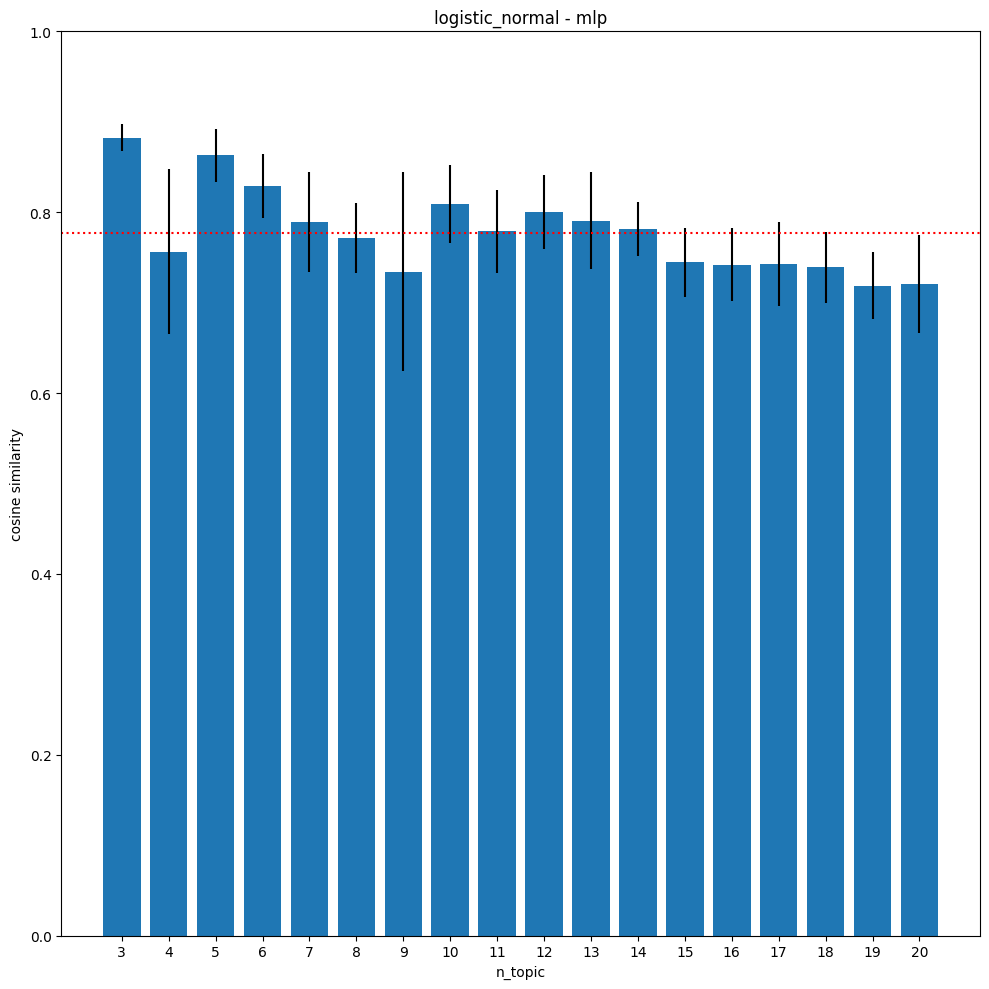

In [5]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (with covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### logi_norm * sage (update=False)

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 92.73it/s]



Epoch   1	Mean Training Loss:3.1767757

Topic_0: ['word_65', 'word_141', 'word_27', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_693', 'word_650', 'word_182', 'word_434']
Topic_2: ['word_648', 'word_78', 'word_685', 'word_891', 'word_21']



Epoch   2	Mean Training Loss:3.1481252

Topic_0: ['word_65', 'word_141', 'word_27', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_693', 'word_69', 'word_650', 'word_182']
Topic_2: ['word_78', 'word_685', 'word_648', 'word_266', 'word_891']



Epoch   3	Mean Training Loss:2.9865808

Topic_0: ['word_65', 'word_141', 'word_27', 'word_787', 'word_332']
Topic_1: ['word_337', 'word_69', 'word_182', 'word_650', 'word_693']
Topic_2: ['word_78', 'word_266', 'word_685', 'word_891', 'word_835']



Epoch   4	Mean Training Loss:2.6473267

Topic_0: ['word_65', 'word_27', 'word_141', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_69', 'word_182', 'word_650', 'word_293']
Topic_2: ['word_78', 'word_266', 'word_891', 'word_835', 'word_982']



Epo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 92.99it/s]



Epoch   1	Mean Training Loss:3.2908854

Topic_0: ['word_319', 'word_757', 'word_474', 'word_748', 'word_850']
Topic_1: ['word_857', 'word_649', 'word_955', 'word_386', 'word_676']
Topic_2: ['word_623', 'word_672', 'word_312', 'word_871', 'word_421']
Topic_3: ['word_287', 'word_801', 'word_82', 'word_286', 'word_958']



Epoch   2	Mean Training Loss:2.9380338

Topic_0: ['word_757', 'word_748', 'word_319', 'word_850', 'word_181']
Topic_1: ['word_649', 'word_857', 'word_386', 'word_955', 'word_648']
Topic_2: ['word_672', 'word_623', 'word_312', 'word_871', 'word_421']
Topic_3: ['word_287', 'word_82', 'word_801', 'word_400', 'word_286']



Epoch   3	Mean Training Loss:2.6087727

Topic_0: ['word_757', 'word_748', 'word_850', 'word_181', 'word_319']
Topic_1: ['word_649', 'word_857', 'word_386', 'word_955', 'word_648']
Topic_2: ['word_672', 'word_871', 'word_623', 'word_312', 'word_421']
Topic_3: ['word_287', 'word_82', 'word_801', 'word_286', 'word_870']



Epoch   4	Mean Training Loss:2.59

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.87it/s]



Epoch   1	Mean Training Loss:3.4013702

Topic_0: ['word_705', 'word_221', 'word_253', 'word_441', 'word_777']
Topic_1: ['word_800', 'word_64', 'word_481', 'word_28', 'word_539']
Topic_2: ['word_976', 'word_177', 'word_741', 'word_311', 'word_438']
Topic_3: ['word_605', 'word_650', 'word_338', 'word_524', 'word_58']
Topic_4: ['word_805', 'word_859', 'word_377', 'word_38', 'word_89']



Epoch   2	Mean Training Loss:3.3415800

Topic_0: ['word_705', 'word_253', 'word_66', 'word_441', 'word_221']
Topic_1: ['word_800', 'word_64', 'word_539', 'word_28', 'word_481']
Topic_2: ['word_976', 'word_177', 'word_741', 'word_311', 'word_678']
Topic_3: ['word_605', 'word_650', 'word_338', 'word_524', 'word_385']
Topic_4: ['word_805', 'word_859', 'word_377', 'word_38', 'word_89']



Epoch   3	Mean Training Loss:2.9812233

Topic_0: ['word_705', 'word_253', 'word_66', 'word_441', 'word_221']
Topic_1: ['word_800', 'word_64', 'word_539', 'word_28', 'word_496']
Topic_2: ['word_976', 'word_678', 'word_311', 

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.93it/s]



Epoch   1	Mean Training Loss:3.4640049

Topic_0: ['word_230', 'word_862', 'word_126', 'word_420', 'word_563']
Topic_1: ['word_582', 'word_474', 'word_68', 'word_4', 'word_515']
Topic_2: ['word_785', 'word_533', 'word_837', 'word_148', 'word_415']
Topic_3: ['word_267', 'word_789', 'word_596', 'word_408', 'word_484']
Topic_4: ['word_715', 'word_440', 'word_337', 'word_230', 'word_236']
Topic_5: ['word_182', 'word_279', 'word_594', 'word_602', 'word_370']



Epoch   2	Mean Training Loss:3.2819872

Topic_0: ['word_230', 'word_862', 'word_420', 'word_939', 'word_126']
Topic_1: ['word_582', 'word_474', 'word_68', 'word_124', 'word_347']
Topic_2: ['word_785', 'word_533', 'word_415', 'word_148', 'word_837']
Topic_3: ['word_267', 'word_789', 'word_596', 'word_408', 'word_145']
Topic_4: ['word_715', 'word_440', 'word_230', 'word_337', 'word_669']
Topic_5: ['word_182', 'word_594', 'word_370', 'word_279', 'word_314']



Epoch   3	Mean Training Loss:2.8683232

Topic_0: ['word_230', 'word_862', 'wo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.71it/s]



Epoch   1	Mean Training Loss:3.4805773

Topic_0: ['word_896', 'word_81', 'word_999', 'word_754', 'word_606']
Topic_1: ['word_708', 'word_124', 'word_946', 'word_625', 'word_874']
Topic_2: ['word_342', 'word_92', 'word_346', 'word_235', 'word_862']
Topic_3: ['word_384', 'word_38', 'word_558', 'word_274', 'word_806']
Topic_4: ['word_396', 'word_676', 'word_296', 'word_202', 'word_291']
Topic_5: ['word_499', 'word_970', 'word_923', 'word_113', 'word_485']
Topic_6: ['word_844', 'word_960', 'word_184', 'word_781', 'word_205']



Epoch   2	Mean Training Loss:3.1619015

Topic_0: ['word_896', 'word_81', 'word_754', 'word_606', 'word_608']
Topic_1: ['word_708', 'word_124', 'word_946', 'word_625', 'word_891']
Topic_2: ['word_342', 'word_92', 'word_346', 'word_235', 'word_862']
Topic_3: ['word_384', 'word_274', 'word_38', 'word_806', 'word_558']
Topic_4: ['word_396', 'word_676', 'word_296', 'word_817', 'word_153']
Topic_5: ['word_499', 'word_497', 'word_970', 'word_923', 'word_401']
Topic_6: ['w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.64it/s]



Epoch   1	Mean Training Loss:3.5338388

Topic_0: ['word_276', 'word_605', 'word_609', 'word_283', 'word_144']
Topic_1: ['word_870', 'word_811', 'word_663', 'word_833', 'word_608']
Topic_2: ['word_683', 'word_491', 'word_79', 'word_15', 'word_2']
Topic_3: ['word_582', 'word_727', 'word_519', 'word_43', 'word_329']
Topic_4: ['word_550', 'word_749', 'word_388', 'word_826', 'word_92']
Topic_5: ['word_235', 'word_390', 'word_154', 'word_233', 'word_955']
Topic_6: ['word_201', 'word_156', 'word_910', 'word_109', 'word_985']
Topic_7: ['word_783', 'word_244', 'word_57', 'word_446', 'word_594']



Epoch   2	Mean Training Loss:3.4452806

Topic_0: ['word_144', 'word_276', 'word_605', 'word_609', 'word_300']
Topic_1: ['word_870', 'word_811', 'word_663', 'word_833', 'word_608']
Topic_2: ['word_683', 'word_491', 'word_79', 'word_15', 'word_2']
Topic_3: ['word_582', 'word_519', 'word_844', 'word_43', 'word_727']
Topic_4: ['word_550', 'word_749', 'word_826', 'word_388', 'word_896']
Topic_5: ['word_23

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.58it/s]



Epoch   1	Mean Training Loss:3.5709677

Topic_0: ['word_583', 'word_451', 'word_889', 'word_744', 'word_577']
Topic_1: ['word_787', 'word_241', 'word_150', 'word_691', 'word_661']
Topic_2: ['word_372', 'word_449', 'word_50', 'word_293', 'word_720']
Topic_3: ['word_599', 'word_803', 'word_832', 'word_658', 'word_673']
Topic_4: ['word_645', 'word_12', 'word_209', 'word_40', 'word_828']
Topic_5: ['word_762', 'word_255', 'word_713', 'word_347', 'word_928']
Topic_6: ['word_694', 'word_999', 'word_684', 'word_961', 'word_118']
Topic_7: ['word_829', 'word_548', 'word_629', 'word_451', 'word_128']
Topic_8: ['word_925', 'word_728', 'word_631', 'word_618', 'word_249']



Epoch   2	Mean Training Loss:3.5120297

Topic_0: ['word_889', 'word_583', 'word_451', 'word_577', 'word_416']
Topic_1: ['word_787', 'word_661', 'word_691', 'word_241', 'word_150']
Topic_2: ['word_372', 'word_293', 'word_449', 'word_50', 'word_924']
Topic_3: ['word_599', 'word_803', 'word_832', 'word_84', 'word_673']
Topic_4: ['

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.24it/s]



Epoch   1	Mean Training Loss:3.6018320

Topic_0: ['word_458', 'word_569', 'word_108', 'word_818', 'word_856']
Topic_1: ['word_444', 'word_511', 'word_603', 'word_735', 'word_557']
Topic_2: ['word_386', 'word_659', 'word_719', 'word_323', 'word_353']
Topic_3: ['word_933', 'word_614', 'word_665', 'word_287', 'word_986']
Topic_4: ['word_525', 'word_405', 'word_668', 'word_88', 'word_326']
Topic_5: ['word_420', 'word_37', 'word_151', 'word_183', 'word_489']
Topic_6: ['word_84', 'word_627', 'word_19', 'word_725', 'word_898']
Topic_7: ['word_325', 'word_605', 'word_254', 'word_486', 'word_669']
Topic_8: ['word_575', 'word_28', 'word_819', 'word_231', 'word_896']
Topic_9: ['word_762', 'word_752', 'word_101', 'word_212', 'word_687']



Epoch   2	Mean Training Loss:3.4036887

Topic_0: ['word_458', 'word_569', 'word_636', 'word_856', 'word_5']
Topic_1: ['word_511', 'word_603', 'word_444', 'word_557', 'word_530']
Topic_2: ['word_386', 'word_950', 'word_719', 'word_659', 'word_541']
Topic_3: ['wo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.50it/s]



Epoch   1	Mean Training Loss:3.6278773

Topic_0: ['word_776', 'word_598', 'word_355', 'word_282', 'word_909']
Topic_1: ['word_371', 'word_476', 'word_531', 'word_896', 'word_985']
Topic_2: ['word_838', 'word_498', 'word_278', 'word_330', 'word_503']
Topic_3: ['word_438', 'word_138', 'word_188', 'word_404', 'word_790']
Topic_4: ['word_343', 'word_672', 'word_413', 'word_392', 'word_105']
Topic_5: ['word_478', 'word_181', 'word_220', 'word_988', 'word_934']
Topic_6: ['word_580', 'word_790', 'word_369', 'word_443', 'word_46']
Topic_7: ['word_45', 'word_755', 'word_91', 'word_693', 'word_694']
Topic_8: ['word_222', 'word_740', 'word_690', 'word_960', 'word_665']
Topic_9: ['word_595', 'word_433', 'word_610', 'word_256', 'word_463']
Topic_10: ['word_92', 'word_309', 'word_737', 'word_301', 'word_964']



Epoch   2	Mean Training Loss:3.4336124

Topic_0: ['word_909', 'word_225', 'word_355', 'word_776', 'word_598']
Topic_1: ['word_531', 'word_371', 'word_476', 'word_279', 'word_124']
Topic_2: 

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.90it/s]



Epoch   1	Mean Training Loss:3.6490723

Topic_0: ['word_548', 'word_628', 'word_505', 'word_369', 'word_945']
Topic_1: ['word_620', 'word_201', 'word_95', 'word_771', 'word_352']
Topic_2: ['word_188', 'word_686', 'word_96', 'word_892', 'word_34']
Topic_3: ['word_248', 'word_914', 'word_129', 'word_811', 'word_688']
Topic_4: ['word_283', 'word_330', 'word_700', 'word_138', 'word_508']
Topic_5: ['word_273', 'word_625', 'word_777', 'word_334', 'word_174']
Topic_6: ['word_465', 'word_549', 'word_818', 'word_813', 'word_952']
Topic_7: ['word_869', 'word_972', 'word_420', 'word_991', 'word_737']
Topic_8: ['word_203', 'word_891', 'word_96', 'word_135', 'word_345']
Topic_9: ['word_137', 'word_292', 'word_890', 'word_256', 'word_290']
Topic_10: ['word_549', 'word_611', 'word_940', 'word_496', 'word_157']
Topic_11: ['word_370', 'word_493', 'word_378', 'word_598', 'word_495']



Epoch   2	Mean Training Loss:3.3871142

Topic_0: ['word_548', 'word_189', 'word_628', 'word_505', 'word_920']
Topic_1:

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.79it/s]



Epoch   1	Mean Training Loss:3.6628551

Topic_0: ['word_298', 'word_894', 'word_694', 'word_393', 'word_288']
Topic_1: ['word_444', 'word_962', 'word_593', 'word_438', 'word_760']
Topic_2: ['word_394', 'word_595', 'word_922', 'word_605', 'word_208']
Topic_3: ['word_247', 'word_491', 'word_720', 'word_404', 'word_124']
Topic_4: ['word_905', 'word_853', 'word_532', 'word_78', 'word_48']
Topic_5: ['word_268', 'word_864', 'word_945', 'word_871', 'word_515']
Topic_6: ['word_226', 'word_156', 'word_510', 'word_190', 'word_167']
Topic_7: ['word_460', 'word_257', 'word_2', 'word_711', 'word_688']
Topic_8: ['word_823', 'word_280', 'word_279', 'word_223', 'word_65']
Topic_9: ['word_885', 'word_669', 'word_81', 'word_50', 'word_871']
Topic_10: ['word_265', 'word_138', 'word_338', 'word_45', 'word_788']
Topic_11: ['word_806', 'word_968', 'word_239', 'word_463', 'word_439']
Topic_12: ['word_502', 'word_38', 'word_768', 'word_760', 'word_241']



Epoch   2	Mean Training Loss:3.4762831

Topic_0: ['w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.98it/s]



Epoch   1	Mean Training Loss:3.6755321

Topic_0: ['word_562', 'word_87', 'word_32', 'word_741', 'word_837']
Topic_1: ['word_296', 'word_776', 'word_305', 'word_7', 'word_23']
Topic_2: ['word_873', 'word_355', 'word_165', 'word_745', 'word_89']
Topic_3: ['word_417', 'word_734', 'word_308', 'word_257', 'word_921']
Topic_4: ['word_608', 'word_284', 'word_65', 'word_587', 'word_392']
Topic_5: ['word_437', 'word_611', 'word_449', 'word_901', 'word_373']
Topic_6: ['word_181', 'word_428', 'word_240', 'word_963', 'word_772']
Topic_7: ['word_694', 'word_94', 'word_360', 'word_209', 'word_78']
Topic_8: ['word_674', 'word_965', 'word_372', 'word_388', 'word_751']
Topic_9: ['word_119', 'word_58', 'word_974', 'word_117', 'word_202']
Topic_10: ['word_486', 'word_354', 'word_322', 'word_165', 'word_218']
Topic_11: ['word_818', 'word_152', 'word_330', 'word_666', 'word_187']
Topic_12: ['word_840', 'word_649', 'word_176', 'word_789', 'word_910']
Topic_13: ['word_135', 'word_718', 'word_171', 'word_584

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.55it/s]



Epoch   1	Mean Training Loss:3.7107607

Topic_0: ['word_569', 'word_278', 'word_683', 'word_563', 'word_302']
Topic_1: ['word_761', 'word_150', 'word_956', 'word_723', 'word_330']
Topic_2: ['word_442', 'word_136', 'word_789', 'word_366', 'word_771']
Topic_3: ['word_670', 'word_983', 'word_473', 'word_341', 'word_899']
Topic_4: ['word_559', 'word_40', 'word_534', 'word_646', 'word_486']
Topic_5: ['word_678', 'word_568', 'word_110', 'word_744', 'word_156']
Topic_6: ['word_494', 'word_134', 'word_308', 'word_631', 'word_88']
Topic_7: ['word_279', 'word_103', 'word_493', 'word_21', 'word_429']
Topic_8: ['word_235', 'word_115', 'word_641', 'word_354', 'word_294']
Topic_9: ['word_517', 'word_551', 'word_883', 'word_727', 'word_160']
Topic_10: ['word_365', 'word_845', 'word_176', 'word_847', 'word_326']
Topic_11: ['word_606', 'word_221', 'word_106', 'word_317', 'word_726']
Topic_12: ['word_515', 'word_634', 'word_178', 'word_489', 'word_502']
Topic_13: ['word_599', 'word_563', 'word_640', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.72it/s]



Epoch   1	Mean Training Loss:3.6940629

Topic_0: ['word_846', 'word_21', 'word_506', 'word_169', 'word_945']
Topic_1: ['word_999', 'word_16', 'word_124', 'word_378', 'word_852']
Topic_2: ['word_751', 'word_628', 'word_210', 'word_956', 'word_744']
Topic_3: ['word_167', 'word_464', 'word_282', 'word_482', 'word_478']
Topic_4: ['word_551', 'word_433', 'word_871', 'word_238', 'word_233']
Topic_5: ['word_966', 'word_545', 'word_188', 'word_940', 'word_531']
Topic_6: ['word_21', 'word_412', 'word_431', 'word_148', 'word_115']
Topic_7: ['word_450', 'word_170', 'word_542', 'word_314', 'word_330']
Topic_8: ['word_663', 'word_563', 'word_11', 'word_391', 'word_274']
Topic_9: ['word_467', 'word_158', 'word_190', 'word_316', 'word_918']
Topic_10: ['word_504', 'word_774', 'word_999', 'word_635', 'word_65']
Topic_11: ['word_114', 'word_81', 'word_528', 'word_506', 'word_406']
Topic_12: ['word_770', 'word_896', 'word_557', 'word_473', 'word_339']
Topic_13: ['word_482', 'word_305', 'word_302', 'word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.62it/s]



Epoch   1	Mean Training Loss:3.7261217

Topic_0: ['word_988', 'word_228', 'word_894', 'word_556', 'word_996']
Topic_1: ['word_89', 'word_413', 'word_653', 'word_194', 'word_201']
Topic_2: ['word_817', 'word_680', 'word_43', 'word_274', 'word_151']
Topic_3: ['word_272', 'word_675', 'word_150', 'word_843', 'word_996']
Topic_4: ['word_483', 'word_802', 'word_905', 'word_406', 'word_733']
Topic_5: ['word_804', 'word_685', 'word_218', 'word_409', 'word_651']
Topic_6: ['word_399', 'word_863', 'word_240', 'word_264', 'word_660']
Topic_7: ['word_701', 'word_892', 'word_296', 'word_228', 'word_111']
Topic_8: ['word_429', 'word_284', 'word_320', 'word_805', 'word_656']
Topic_9: ['word_238', 'word_463', 'word_440', 'word_590', 'word_196']
Topic_10: ['word_9', 'word_458', 'word_618', 'word_992', 'word_681']
Topic_11: ['word_80', 'word_355', 'word_998', 'word_335', 'word_547']
Topic_12: ['word_577', 'word_497', 'word_45', 'word_433', 'word_397']
Topic_13: ['word_796', 'word_471', 'word_747', 'word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.88it/s]



Epoch   1	Mean Training Loss:3.7379853

Topic_0: ['word_593', 'word_295', 'word_131', 'word_681', 'word_894']
Topic_1: ['word_146', 'word_77', 'word_819', 'word_550', 'word_878']
Topic_2: ['word_259', 'word_715', 'word_707', 'word_476', 'word_708']
Topic_3: ['word_727', 'word_22', 'word_480', 'word_952', 'word_101']
Topic_4: ['word_331', 'word_0', 'word_36', 'word_475', 'word_896']
Topic_5: ['word_56', 'word_430', 'word_724', 'word_654', 'word_130']
Topic_6: ['word_944', 'word_278', 'word_965', 'word_150', 'word_489']
Topic_7: ['word_475', 'word_365', 'word_988', 'word_980', 'word_223']
Topic_8: ['word_796', 'word_326', 'word_823', 'word_534', 'word_980']
Topic_9: ['word_273', 'word_424', 'word_601', 'word_190', 'word_974']
Topic_10: ['word_50', 'word_919', 'word_662', 'word_618', 'word_755']
Topic_11: ['word_234', 'word_893', 'word_522', 'word_383', 'word_373']
Topic_12: ['word_296', 'word_395', 'word_273', 'word_685', 'word_213']
Topic_13: ['word_243', 'word_242', 'word_599', 'word_

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.54it/s]



Epoch   1	Mean Training Loss:3.7264630

Topic_0: ['word_779', 'word_958', 'word_710', 'word_8', 'word_644']
Topic_1: ['word_182', 'word_202', 'word_191', 'word_932', 'word_378']
Topic_2: ['word_31', 'word_137', 'word_89', 'word_303', 'word_676']
Topic_3: ['word_366', 'word_687', 'word_220', 'word_710', 'word_412']
Topic_4: ['word_401', 'word_342', 'word_14', 'word_748', 'word_233']
Topic_5: ['word_299', 'word_710', 'word_464', 'word_447', 'word_499']
Topic_6: ['word_796', 'word_572', 'word_945', 'word_130', 'word_429']
Topic_7: ['word_431', 'word_228', 'word_635', 'word_908', 'word_166']
Topic_8: ['word_270', 'word_3', 'word_612', 'word_267', 'word_636']
Topic_9: ['word_991', 'word_543', 'word_673', 'word_807', 'word_119']
Topic_10: ['word_725', 'word_669', 'word_215', 'word_913', 'word_860']
Topic_11: ['word_10', 'word_86', 'word_736', 'word_665', 'word_201']
Topic_12: ['word_488', 'word_37', 'word_880', 'word_823', 'word_905']
Topic_13: ['word_736', 'word_617', 'word_334', 'word_752

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.71it/s]



Epoch   1	Mean Training Loss:3.7590100

Topic_0: ['word_181', 'word_644', 'word_601', 'word_889', 'word_213']
Topic_1: ['word_835', 'word_83', 'word_273', 'word_122', 'word_293']
Topic_2: ['word_378', 'word_670', 'word_185', 'word_635', 'word_66']
Topic_3: ['word_301', 'word_774', 'word_797', 'word_22', 'word_643']
Topic_4: ['word_152', 'word_66', 'word_635', 'word_993', 'word_1']
Topic_5: ['word_574', 'word_225', 'word_777', 'word_571', 'word_307']
Topic_6: ['word_17', 'word_999', 'word_459', 'word_254', 'word_77']
Topic_7: ['word_130', 'word_869', 'word_994', 'word_120', 'word_179']
Topic_8: ['word_881', 'word_230', 'word_210', 'word_639', 'word_280']
Topic_9: ['word_709', 'word_316', 'word_212', 'word_347', 'word_611']
Topic_10: ['word_6', 'word_770', 'word_934', 'word_434', 'word_310']
Topic_11: ['word_56', 'word_331', 'word_808', 'word_667', 'word_824']
Topic_12: ['word_186', 'word_285', 'word_645', 'word_225', 'word_245']
Topic_13: ['word_649', 'word_943', 'word_181', 'word_18',

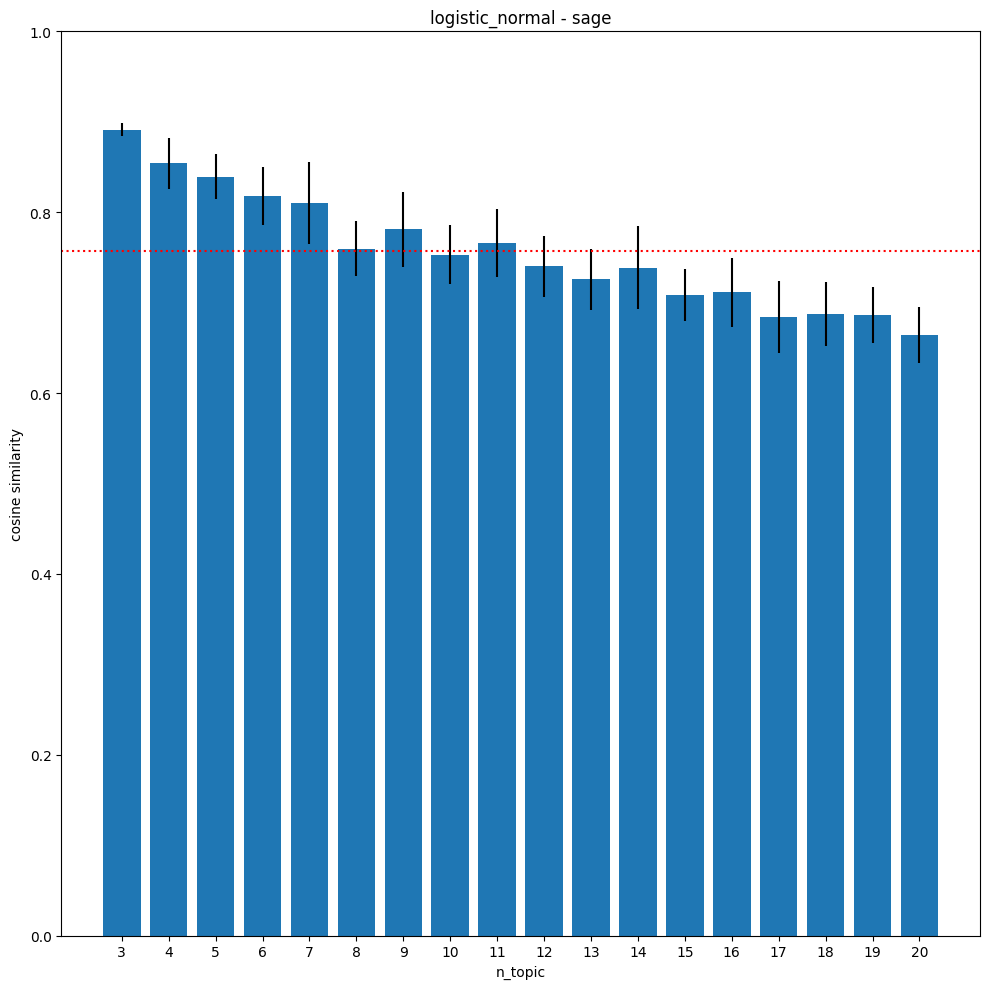

In [6]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": False,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (without covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### diri * sage (update=True)

100%|██████████| 10000/10000 [01:46<00:00, 93.80it/s]



Epoch   1	Mean Training Loss:3.2295244

Topic_0: ['word_494', 'word_268', 'word_648', 'word_269', 'word_829']
Topic_1: ['word_335', 'word_10', 'word_100', 'word_964', 'word_432']
Topic_2: ['word_95', 'word_646', 'word_133', 'word_654', 'word_898']



Epoch   2	Mean Training Loss:2.6132929

Topic_0: ['word_494', 'word_268', 'word_648', 'word_729', 'word_269']
Topic_1: ['word_335', 'word_10', 'word_964', 'word_100', 'word_222']
Topic_2: ['word_846', 'word_898', 'word_189', 'word_95', 'word_133']



Epoch   3	Mean Training Loss:2.6058991

Topic_0: ['word_494', 'word_268', 'word_729', 'word_368', 'word_462']
Topic_1: ['word_964', 'word_335', 'word_10', 'word_222', 'word_690']
Topic_2: ['word_846', 'word_189', 'word_121', 'word_898', 'word_217']



Epoch   4	Mean Training Loss:2.5997746

Topic_0: ['word_494', 'word_268', 'word_729', 'word_368', 'word_462']
Topic_1: ['word_964', 'word_240', 'word_690', 'word_10', 'word_222']
Topic_2: ['word_846', 'word_121', 'word_189', 'word_217', 'word_23

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.82it/s]



Epoch   1	Mean Training Loss:3.3538223

Topic_0: ['word_860', 'word_472', 'word_59', 'word_906', 'word_259']
Topic_1: ['word_187', 'word_674', 'word_200', 'word_564', 'word_953']
Topic_2: ['word_476', 'word_941', 'word_169', 'word_87', 'word_225']
Topic_3: ['word_285', 'word_548', 'word_527', 'word_192', 'word_284']



Epoch   2	Mean Training Loss:2.6126996

Topic_0: ['word_472', 'word_860', 'word_59', 'word_259', 'word_8']
Topic_1: ['word_674', 'word_187', 'word_953', 'word_647', 'word_67']
Topic_2: ['word_476', 'word_169', 'word_310', 'word_941', 'word_87']
Topic_3: ['word_548', 'word_198', 'word_957', 'word_814', 'word_15']



Epoch   3	Mean Training Loss:2.6077473

Topic_0: ['word_472', 'word_860', 'word_59', 'word_710', 'word_8']
Topic_1: ['word_674', 'word_187', 'word_647', 'word_67', 'word_953']
Topic_2: ['word_476', 'word_310', 'word_169', 'word_612', 'word_87']
Topic_3: ['word_548', 'word_198', 'word_957', 'word_15', 'word_768']



Epoch   4	Mean Training Loss:2.6013152

Topi

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 94.13it/s]



Epoch   1	Mean Training Loss:3.4244927

Topic_0: ['word_22', 'word_775', 'word_382', 'word_450', 'word_539']
Topic_1: ['word_48', 'word_730', 'word_277', 'word_248', 'word_765']
Topic_2: ['word_175', 'word_834', 'word_531', 'word_156', 'word_31']
Topic_3: ['word_435', 'word_93', 'word_932', 'word_865', 'word_854']
Topic_4: ['word_803', 'word_375', 'word_722', 'word_426', 'word_606']



Epoch   2	Mean Training Loss:2.6233052

Topic_0: ['word_775', 'word_382', 'word_22', 'word_703', 'word_539']
Topic_1: ['word_48', 'word_765', 'word_730', 'word_277', 'word_883']
Topic_2: ['word_175', 'word_834', 'word_531', 'word_156', 'word_974']
Topic_3: ['word_435', 'word_93', 'word_865', 'word_27', 'word_383']
Topic_4: ['word_803', 'word_722', 'word_129', 'word_368', 'word_606']



Epoch   3	Mean Training Loss:2.6088535

Topic_0: ['word_382', 'word_775', 'word_703', 'word_22', 'word_685']
Topic_1: ['word_48', 'word_765', 'word_883', 'word_8', 'word_730']
Topic_2: ['word_175', 'word_834', 'word_531',

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.91it/s]



Epoch   1	Mean Training Loss:3.5032702

Topic_0: ['word_536', 'word_475', 'word_643', 'word_466', 'word_148']
Topic_1: ['word_762', 'word_989', 'word_580', 'word_148', 'word_398']
Topic_2: ['word_682', 'word_633', 'word_146', 'word_854', 'word_575']
Topic_3: ['word_605', 'word_885', 'word_594', 'word_89', 'word_704']
Topic_4: ['word_643', 'word_234', 'word_713', 'word_667', 'word_372']
Topic_5: ['word_164', 'word_220', 'word_180', 'word_176', 'word_369']



Epoch   2	Mean Training Loss:2.6159904

Topic_0: ['word_536', 'word_475', 'word_466', 'word_643', 'word_77']
Topic_1: ['word_762', 'word_580', 'word_989', 'word_699', 'word_398']
Topic_2: ['word_633', 'word_682', 'word_146', 'word_575', 'word_184']
Topic_3: ['word_605', 'word_143', 'word_594', 'word_247', 'word_885']
Topic_4: ['word_234', 'word_372', 'word_921', 'word_450', 'word_28']
Topic_5: ['word_220', 'word_180', 'word_450', 'word_721', 'word_837']



Epoch   3	Mean Training Loss:2.6062883

Topic_0: ['word_536', 'word_466', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 94.18it/s]



Epoch   1	Mean Training Loss:3.5614121

Topic_0: ['word_997', 'word_49', 'word_998', 'word_808', 'word_210']
Topic_1: ['word_393', 'word_122', 'word_706', 'word_893', 'word_617']
Topic_2: ['word_742', 'word_72', 'word_233', 'word_860', 'word_898']
Topic_3: ['word_382', 'word_556', 'word_55', 'word_284', 'word_370']
Topic_4: ['word_151', 'word_146', 'word_91', 'word_932', 'word_538']
Topic_5: ['word_497', 'word_870', 'word_154', 'word_969', 'word_977']
Topic_6: ['word_946', 'word_322', 'word_691', 'word_305', 'word_826']



Epoch   2	Mean Training Loss:2.6165900

Topic_0: ['word_997', 'word_49', 'word_210', 'word_998', 'word_808']
Topic_1: ['word_393', 'word_122', 'word_706', 'word_893', 'word_89']
Topic_2: ['word_233', 'word_860', 'word_340', 'word_72', 'word_898']
Topic_3: ['word_556', 'word_370', 'word_284', 'word_393', 'word_382']
Topic_4: ['word_151', 'word_146', 'word_91', 'word_962', 'word_932']
Topic_5: ['word_497', 'word_870', 'word_969', 'word_154', 'word_77']
Topic_6: ['word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.95it/s]



Epoch   1	Mean Training Loss:3.6092644

Topic_0: ['word_38', 'word_739', 'word_500', 'word_356', 'word_137']
Topic_1: ['word_839', 'word_831', 'word_81', 'word_661', 'word_137']
Topic_2: ['word_148', 'word_235', 'word_609', 'word_128', 'word_198']
Topic_3: ['word_754', 'word_725', 'word_715', 'word_974', 'word_915']
Topic_4: ['word_31', 'word_549', 'word_890', 'word_824', 'word_980']
Topic_5: ['word_953', 'word_389', 'word_233', 'word_880', 'word_806']
Topic_6: ['word_935', 'word_709', 'word_107', 'word_715', 'word_768']
Topic_7: ['word_781', 'word_956', 'word_557', 'word_242', 'word_426']



Epoch   2	Mean Training Loss:2.6159862

Topic_0: ['word_739', 'word_38', 'word_500', 'word_97', 'word_137']
Topic_1: ['word_839', 'word_831', 'word_661', 'word_137', 'word_489']
Topic_2: ['word_148', 'word_609', 'word_235', 'word_567', 'word_198']
Topic_3: ['word_754', 'word_715', 'word_915', 'word_974', 'word_725']
Topic_4: ['word_31', 'word_549', 'word_824', 'word_890', 'word_88']
Topic_5: ['wo

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 94.03it/s]



Epoch   1	Mean Training Loss:3.6134159

Topic_0: ['word_575', 'word_581', 'word_608', 'word_928', 'word_321']
Topic_1: ['word_24', 'word_605', 'word_755', 'word_535', 'word_512']
Topic_2: ['word_370', 'word_300', 'word_949', 'word_499', 'word_132']
Topic_3: ['word_256', 'word_135', 'word_5', 'word_656', 'word_94']
Topic_4: ['word_399', 'word_100', 'word_426', 'word_118', 'word_643']
Topic_5: ['word_130', 'word_819', 'word_926', 'word_253', 'word_126']
Topic_6: ['word_200', 'word_818', 'word_653', 'word_557', 'word_457']
Topic_7: ['word_627', 'word_429', 'word_662', 'word_735', 'word_864']
Topic_8: ['word_923', 'word_540', 'word_726', 'word_834', 'word_153']



Epoch   2	Mean Training Loss:2.6144988

Topic_0: ['word_575', 'word_581', 'word_608', 'word_329', 'word_414']
Topic_1: ['word_24', 'word_755', 'word_605', 'word_38', 'word_512']
Topic_2: ['word_370', 'word_300', 'word_949', 'word_132', 'word_499']
Topic_3: ['word_256', 'word_94', 'word_135', 'word_801', 'word_5']
Topic_4: ['word

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.67it/s]



Epoch   1	Mean Training Loss:3.6344014

Topic_0: ['word_691', 'word_551', 'word_890', 'word_106', 'word_148']
Topic_1: ['word_51', 'word_877', 'word_68', 'word_525', 'word_135']
Topic_2: ['word_556', 'word_600', 'word_11', 'word_658', 'word_948']
Topic_3: ['word_262', 'word_242', 'word_195', 'word_337', 'word_991']
Topic_4: ['word_190', 'word_420', 'word_656', 'word_403', 'word_698']
Topic_5: ['word_533', 'word_948', 'word_369', 'word_674', 'word_393']
Topic_6: ['word_499', 'word_920', 'word_188', 'word_754', 'word_816']
Topic_7: ['word_252', 'word_603', 'word_507', 'word_937', 'word_456']
Topic_8: ['word_278', 'word_515', 'word_573', 'word_817', 'word_355']
Topic_9: ['word_841', 'word_10', 'word_208', 'word_599', 'word_760']



Epoch   2	Mean Training Loss:2.6220488

Topic_0: ['word_691', 'word_551', 'word_106', 'word_890', 'word_297']
Topic_1: ['word_51', 'word_877', 'word_525', 'word_68', 'word_80']
Topic_2: ['word_600', 'word_556', 'word_658', 'word_948', 'word_11']
Topic_3: ['wor

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.67it/s]



Epoch   1	Mean Training Loss:3.6710240

Topic_0: ['word_774', 'word_287', 'word_409', 'word_262', 'word_611']
Topic_1: ['word_173', 'word_428', 'word_474', 'word_297', 'word_37']
Topic_2: ['word_63', 'word_471', 'word_531', 'word_484', 'word_836']
Topic_3: ['word_544', 'word_945', 'word_710', 'word_789', 'word_186']
Topic_4: ['word_977', 'word_390', 'word_669', 'word_427', 'word_723']
Topic_5: ['word_18', 'word_756', 'word_246', 'word_994', 'word_986']
Topic_6: ['word_86', 'word_165', 'word_291', 'word_789', 'word_917']
Topic_7: ['word_692', 'word_306', 'word_539', 'word_448', 'word_388']
Topic_8: ['word_808', 'word_959', 'word_689', 'word_557', 'word_619']
Topic_9: ['word_493', 'word_254', 'word_605', 'word_461', 'word_428']
Topic_10: ['word_962', 'word_669', 'word_977', 'word_996', 'word_531']



Epoch   2	Mean Training Loss:2.6171822

Topic_0: ['word_774', 'word_287', 'word_223', 'word_596', 'word_611']
Topic_1: ['word_173', 'word_474', 'word_297', 'word_428', 'word_287']
Topic_2: 

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.78it/s]



Epoch   1	Mean Training Loss:3.6699402

Topic_0: ['word_412', 'word_943', 'word_598', 'word_585', 'word_318']
Topic_1: ['word_948', 'word_619', 'word_568', 'word_350', 'word_967']
Topic_2: ['word_982', 'word_567', 'word_204', 'word_890', 'word_22']
Topic_3: ['word_846', 'word_831', 'word_912', 'word_40', 'word_306']
Topic_4: ['word_296', 'word_886', 'word_506', 'word_762', 'word_447']
Topic_5: ['word_674', 'word_332', 'word_286', 'word_658', 'word_479']
Topic_6: ['word_59', 'word_355', 'word_790', 'word_950', 'word_816']
Topic_7: ['word_140', 'word_867', 'word_991', 'word_11', 'word_102']
Topic_8: ['word_412', 'word_201', 'word_89', 'word_343', 'word_385']
Topic_9: ['word_31', 'word_254', 'word_318', 'word_575', 'word_692']
Topic_10: ['word_61', 'word_461', 'word_851', 'word_963', 'word_598']
Topic_11: ['word_787', 'word_641', 'word_369', 'word_908', 'word_214']



Epoch   2	Mean Training Loss:2.6172475

Topic_0: ['word_412', 'word_943', 'word_598', 'word_585', 'word_318']
Topic_1: ['

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.84it/s]



Epoch   1	Mean Training Loss:3.7088966

Topic_0: ['word_57', 'word_286', 'word_702', 'word_294', 'word_461']
Topic_1: ['word_960', 'word_239', 'word_324', 'word_109', 'word_477']
Topic_2: ['word_907', 'word_611', 'word_733', 'word_175', 'word_824']
Topic_3: ['word_668', 'word_122', 'word_402', 'word_418', 'word_791']
Topic_4: ['word_903', 'word_530', 'word_187', 'word_778', 'word_972']
Topic_5: ['word_513', 'word_862', 'word_881', 'word_827', 'word_76']
Topic_6: ['word_241', 'word_154', 'word_224', 'word_327', 'word_702']
Topic_7: ['word_850', 'word_198', 'word_25', 'word_702', 'word_844']
Topic_8: ['word_440', 'word_221', 'word_15', 'word_821', 'word_449']
Topic_9: ['word_808', 'word_416', 'word_789', 'word_883', 'word_980']
Topic_10: ['word_764', 'word_786', 'word_263', 'word_827', 'word_738']
Topic_11: ['word_461', 'word_804', 'word_237', 'word_714', 'word_370']
Topic_12: ['word_184', 'word_183', 'word_881', 'word_814', 'word_162']



Epoch   2	Mean Training Loss:2.6174007

Topic_0

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.46it/s]



Epoch   1	Mean Training Loss:3.7090435

Topic_0: ['word_421', 'word_861', 'word_868', 'word_41', 'word_428']
Topic_1: ['word_58', 'word_664', 'word_987', 'word_698', 'word_894']
Topic_2: ['word_353', 'word_2', 'word_36', 'word_888', 'word_515']
Topic_3: ['word_515', 'word_330', 'word_769', 'word_748', 'word_725']
Topic_4: ['word_282', 'word_58', 'word_164', 'word_584', 'word_648']
Topic_5: ['word_795', 'word_601', 'word_90', 'word_544', 'word_61']
Topic_6: ['word_18', 'word_656', 'word_426', 'word_385', 'word_600']
Topic_7: ['word_6', 'word_158', 'word_478', 'word_857', 'word_938']
Topic_8: ['word_705', 'word_370', 'word_287', 'word_908', 'word_727']
Topic_9: ['word_612', 'word_972', 'word_842', 'word_708', 'word_760']
Topic_10: ['word_842', 'word_726', 'word_484', 'word_693', 'word_865']
Topic_11: ['word_321', 'word_100', 'word_2', 'word_664', 'word_250']
Topic_12: ['word_214', 'word_99', 'word_280', 'word_920', 'word_735']
Topic_13: ['word_439', 'word_529', 'word_17', 'word_886', 'w

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.69it/s]



Epoch   1	Mean Training Loss:3.7376698

Topic_0: ['word_1', 'word_209', 'word_567', 'word_951', 'word_806']
Topic_1: ['word_754', 'word_479', 'word_149', 'word_450', 'word_6']
Topic_2: ['word_338', 'word_17', 'word_633', 'word_134', 'word_255']
Topic_3: ['word_225', 'word_865', 'word_508', 'word_905', 'word_683']
Topic_4: ['word_557', 'word_451', 'word_486', 'word_399', 'word_874']
Topic_5: ['word_624', 'word_793', 'word_742', 'word_672', 'word_921']
Topic_6: ['word_492', 'word_891', 'word_175', 'word_517', 'word_290']
Topic_7: ['word_277', 'word_0', 'word_590', 'word_119', 'word_546']
Topic_8: ['word_233', 'word_120', 'word_64', 'word_960', 'word_505']
Topic_9: ['word_960', 'word_6', 'word_169', 'word_929', 'word_607']
Topic_10: ['word_324', 'word_690', 'word_636', 'word_174', 'word_136']
Topic_11: ['word_315', 'word_470', 'word_608', 'word_429', 'word_683']
Topic_12: ['word_209', 'word_593', 'word_442', 'word_487', 'word_176']
Topic_13: ['word_774', 'word_52', 'word_950', 'word_242'

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.76it/s]



Epoch   1	Mean Training Loss:3.7570147

Topic_0: ['word_556', 'word_966', 'word_637', 'word_399', 'word_463']
Topic_1: ['word_997', 'word_634', 'word_224', 'word_158', 'word_352']
Topic_2: ['word_42', 'word_406', 'word_535', 'word_511', 'word_394']
Topic_3: ['word_207', 'word_480', 'word_346', 'word_705', 'word_567']
Topic_4: ['word_87', 'word_324', 'word_705', 'word_257', 'word_431']
Topic_5: ['word_181', 'word_292', 'word_964', 'word_913', 'word_53']
Topic_6: ['word_410', 'word_113', 'word_221', 'word_63', 'word_258']
Topic_7: ['word_728', 'word_312', 'word_449', 'word_194', 'word_483']
Topic_8: ['word_181', 'word_42', 'word_109', 'word_908', 'word_847']
Topic_9: ['word_981', 'word_68', 'word_42', 'word_290', 'word_519']
Topic_10: ['word_407', 'word_772', 'word_997', 'word_633', 'word_52']
Topic_11: ['word_160', 'word_900', 'word_276', 'word_848', 'word_362']
Topic_12: ['word_769', 'word_825', 'word_133', 'word_894', 'word_652']
Topic_13: ['word_912', 'word_303', 'word_480', 'word_5

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.02it/s]



Epoch   1	Mean Training Loss:3.7511490

Topic_0: ['word_912', 'word_812', 'word_554', 'word_226', 'word_335']
Topic_1: ['word_148', 'word_320', 'word_812', 'word_651', 'word_670']
Topic_2: ['word_451', 'word_815', 'word_209', 'word_429', 'word_303']
Topic_3: ['word_163', 'word_841', 'word_930', 'word_135', 'word_426']
Topic_4: ['word_73', 'word_175', 'word_903', 'word_615', 'word_858']
Topic_5: ['word_184', 'word_161', 'word_783', 'word_514', 'word_457']
Topic_6: ['word_659', 'word_861', 'word_85', 'word_703', 'word_851']
Topic_7: ['word_247', 'word_294', 'word_70', 'word_336', 'word_388']
Topic_8: ['word_427', 'word_440', 'word_793', 'word_320', 'word_628']
Topic_9: ['word_589', 'word_555', 'word_553', 'word_208', 'word_307']
Topic_10: ['word_456', 'word_990', 'word_87', 'word_111', 'word_897']
Topic_11: ['word_227', 'word_333', 'word_793', 'word_485', 'word_56']
Topic_12: ['word_939', 'word_575', 'word_548', 'word_897', 'word_914']
Topic_13: ['word_794', 'word_512', 'word_209', 'wor

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.86it/s]



Epoch   1	Mean Training Loss:3.7727286

Topic_0: ['word_659', 'word_433', 'word_912', 'word_591', 'word_891']
Topic_1: ['word_994', 'word_144', 'word_817', 'word_768', 'word_953']
Topic_2: ['word_188', 'word_474', 'word_66', 'word_639', 'word_83']
Topic_3: ['word_783', 'word_996', 'word_954', 'word_153', 'word_950']
Topic_4: ['word_33', 'word_602', 'word_20', 'word_260', 'word_685']
Topic_5: ['word_901', 'word_223', 'word_311', 'word_156', 'word_368']
Topic_6: ['word_124', 'word_695', 'word_756', 'word_276', 'word_804']
Topic_7: ['word_550', 'word_376', 'word_190', 'word_473', 'word_664']
Topic_8: ['word_794', 'word_625', 'word_313', 'word_44', 'word_737']
Topic_9: ['word_474', 'word_34', 'word_972', 'word_94', 'word_223']
Topic_10: ['word_499', 'word_594', 'word_769', 'word_66', 'word_136']
Topic_11: ['word_526', 'word_75', 'word_337', 'word_47', 'word_801']
Topic_12: ['word_837', 'word_297', 'word_211', 'word_42', 'word_609']
Topic_13: ['word_801', 'word_846', 'word_664', 'word_995'

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:47<00:00, 93.10it/s]



Epoch   1	Mean Training Loss:3.7501843

Topic_0: ['word_956', 'word_54', 'word_535', 'word_151', 'word_870']
Topic_1: ['word_523', 'word_180', 'word_747', 'word_356', 'word_632']
Topic_2: ['word_402', 'word_349', 'word_290', 'word_23', 'word_105']
Topic_3: ['word_323', 'word_961', 'word_685', 'word_219', 'word_971']
Topic_4: ['word_340', 'word_746', 'word_63', 'word_661', 'word_316']
Topic_5: ['word_111', 'word_504', 'word_445', 'word_709', 'word_993']
Topic_6: ['word_427', 'word_293', 'word_748', 'word_274', 'word_656']
Topic_7: ['word_526', 'word_861', 'word_467', 'word_942', 'word_460']
Topic_8: ['word_340', 'word_996', 'word_298', 'word_610', 'word_136']
Topic_9: ['word_913', 'word_851', 'word_99', 'word_541', 'word_801']
Topic_10: ['word_349', 'word_230', 'word_196', 'word_859', 'word_180']
Topic_11: ['word_686', 'word_718', 'word_101', 'word_295', 'word_843']
Topic_12: ['word_670', 'word_368', 'word_577', 'word_33', 'word_486']
Topic_13: ['word_913', 'word_262', 'word_624', 'wor

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 10000/10000 [01:46<00:00, 93.86it/s]



Epoch   1	Mean Training Loss:3.7635729

Topic_0: ['word_642', 'word_211', 'word_889', 'word_490', 'word_280']
Topic_1: ['word_271', 'word_456', 'word_56', 'word_612', 'word_120']
Topic_2: ['word_669', 'word_923', 'word_175', 'word_670', 'word_456']
Topic_3: ['word_736', 'word_30', 'word_925', 'word_170', 'word_124']
Topic_4: ['word_242', 'word_991', 'word_698', 'word_454', 'word_216']
Topic_5: ['word_663', 'word_828', 'word_517', 'word_856', 'word_657']
Topic_6: ['word_740', 'word_252', 'word_34', 'word_211', 'word_768']
Topic_7: ['word_225', 'word_130', 'word_119', 'word_449', 'word_404']
Topic_8: ['word_511', 'word_980', 'word_876', 'word_89', 'word_95']
Topic_9: ['word_968', 'word_905', 'word_723', 'word_345', 'word_541']
Topic_10: ['word_511', 'word_561', 'word_697', 'word_932', 'word_432']
Topic_11: ['word_151', 'word_720', 'word_517', 'word_806', 'word_271']
Topic_12: ['word_273', 'word_298', 'word_643', 'word_723', 'word_252']
Topic_13: ['word_246', 'word_720', 'word_151', 'wor

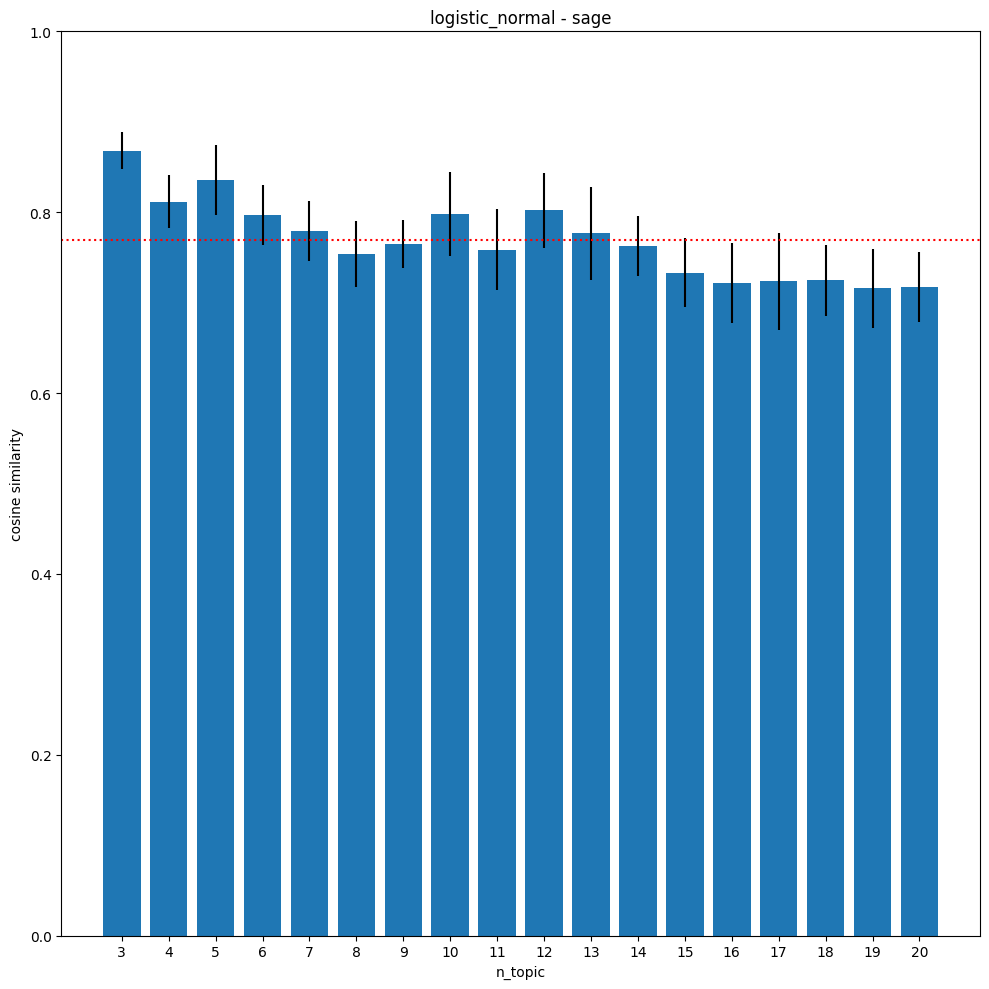

In [7]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "logistic_normal",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (with covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()